<a href="https://colab.research.google.com/github/revak18/Science-Fair-2024/blob/main/TreeMortality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='210313089991')
import pandas as pd
import altair as alt
import numpy as np
import folium
import requests
import json
import geopandas as gpd
import seaborn as sns

#Import Data files for dead and alive trees

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/df_FTM_FINAL.csv'
df_FTM_FINAL = pd.read_csv(file_path)
df_FTM_FINAL = df_FTM_FINAL.drop(columns=['Dataset','yr_fire','Longitude','Latitude'])
df_FTM_FINAL = df_FTM_FINAL.rename(columns={'PrevYr_H1': 'PrevYr_H1_PDSI', 'PrevYr_H2': 'PrevYr_H2_PDSI',
                                            'Yr0_H1': 'Yr0_H1_PDSI', 'Yr0_H2': 'Yr0_H2_PDSI',
                                            'Yr1_H1': 'Yr1_H1_PDSI', 'Yr1_H2': 'Yr1_H2_PDSI',
                                            'Yr2_H1': 'Yr2_H1_PDSI', 'Yr2_H2': 'Yr2_H2_PDSI',
                                            "dNBR": "dNBR_LT","NBR_min": "NBR_min_LT",
                                            "RdNBR": "RdNBR_LT","dNBR_6MO": "dNBR_ST",
                                            "NBR_min_6MO": "NBR_min_ST","RdNBR_6MO": "RdNBR_ST"})
df_FTM_FINAL.sample(1)

Mounted at /content/drive


,YrFireName,uid,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,...,Yr0_H1_NBR,Yr0_H2_NBR,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_ST,NBR_min_ST,RdNBR_ST,tree_status
988,2002 - Ramer Tower East,62907430,-2.248392,-2.070279,-0.862529,1.024704,-2.450525,-1.835555,-1.985284,-2.480391,...,-0.001197,-0.043325,0.068909,0.06508,0.0023,-0.045458,-2.98072,-0.045458,2.650813,2.0


In [ ]:
df_FTM_FINAL.columns

Index(['YrFireName', 'uid', 'PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',
       'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',
       'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR', 'dNBR_LT', 'NBR_min_LT',
       'RdNBR_LT', 'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR',
       'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',
       'dNBR_ST', 'NBR_min_ST', 'RdNBR_ST', 'tree_status'],
      dtype='object')

In [ ]:
file_path = '/content/drive/My Drive/df_FTM_FINAL_2.csv'
df_FTM_FINAL_2 = pd.read_csv(file_path)
df_FTM_FINAL_2.sample(1)

,YrFireName,uid,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,...,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_LT,NBR_min_LT,RdNBR_LT,dNBR_ST,NBR_min_ST,RdNBR_ST,tree_status
55,Alive_Tree_Record,80309390,2.198254,1.687735,0.58752,-0.260582,2.371129,1.900903,1.46784,1.048063,...,0.408393,0.604168,0.412745,-20.519305,0.437145,-19.365324,-32.300422,0.33328,-17.922677,0


In [ ]:
df_FTM_FINAL_2.columns

Index(['YrFireName', 'uid', 'PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',
       'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',
       'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR', 'PrevYr_H1_NBR',
       'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR',
       'Yr2_H1_NBR', 'Yr2_H2_NBR', 'dNBR_LT', 'NBR_min_LT', 'RdNBR_LT',
       'dNBR_ST', 'NBR_min_ST', 'RdNBR_ST', 'tree_status'],
      dtype='object')

# Data Analysis Charts

**NBR Scatter Plots**

In [ ]:
# Function for scatter plots
def plot_scatter(uid,PreVal,PostVal,Term,cset):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 4))

  if cset == 'colorset1':
    c1 = 'green'
    c2 = 'lightblue'
  else:
    c1 = 'pink'
    c2 = 'yellow'

  PreLabel = 'Pre-Fire NBR'
  PostLabel = 'Post-Fire NBR'
  plt.scatter(uid, PreVal, color=c1, marker = '.',label=PreLabel)
  plt.scatter(uid, PostVal, color=c2, marker = '.', label=PostLabel)

  # Calculating the mean
  mean_PrevYr_H1_NBR = np.mean(PreVal)
  mean_NBR_min_ST = np.mean(PostVal)
  plt.axhline(y=mean_PrevYr_H1_NBR, color='red', linestyle='--', label=f'Mean NBR before Fire: {mean_PrevYr_H1_NBR:.2f}')
  plt.axhline(y=mean_NBR_min_ST, color='blue', linestyle='--', label=f'Mean NBR after Fire: {mean_NBR_min_ST:.2f}')

  #plt.xlabel('Record Index')
  plt.ylabel('NBR Values')
  tle = Term + ' ' + 'Pre-Fire and Post-Fire NBR Values'
  plt.title(tle)
  plt.xticks([])

  #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.legend()
  plt.tight_layout()
  # Show plot
  plt.show()
  return

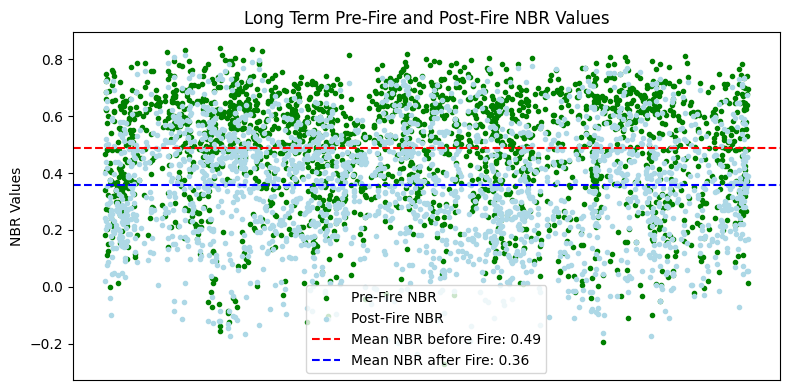

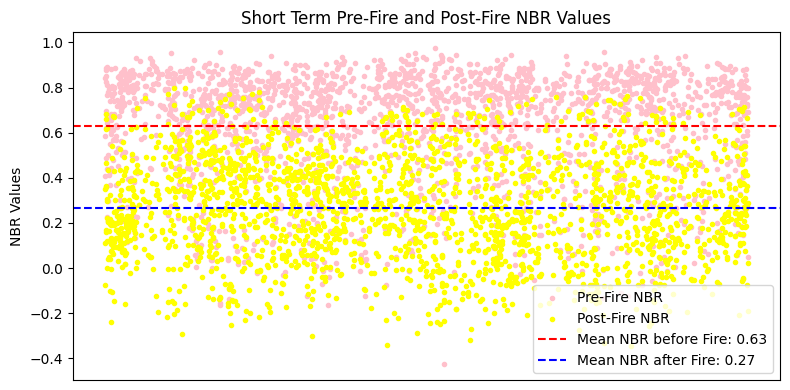

In [ ]:
# Scatter plots for Dead Trees
ax1 = plot_scatter(df_FTM_FINAL['uid'], df_FTM_FINAL['PrevYr_NBR'],df_FTM_FINAL['NBR_min_LT'],'Long Term','colorset1')
ax2 = plot_scatter(df_FTM_FINAL['uid'], df_FTM_FINAL['PrevYr_H1_NBR'],df_FTM_FINAL['NBR_min_ST'],'Short Term','colorset2')

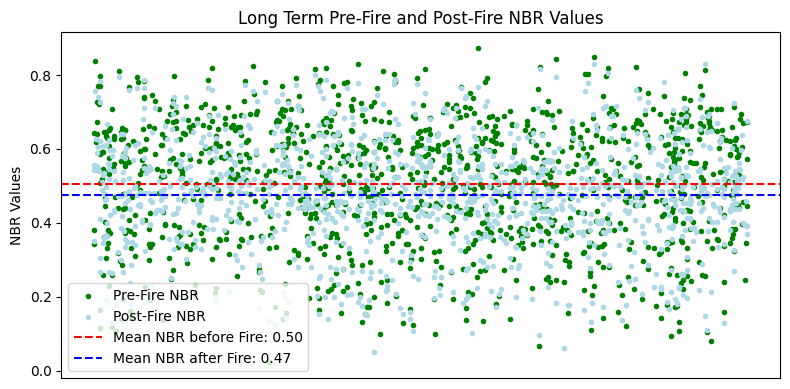

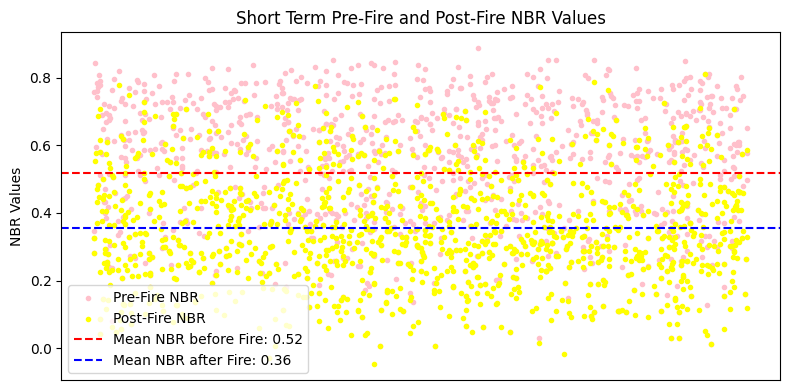

In [ ]:
# Scatter plots for Alive Trees
uid = abs(df_FTM_FINAL_2['uid']) % 1000
plot_scatter(uid, df_FTM_FINAL_2['PrevYr_NBR'],df_FTM_FINAL_2['NBR_min_LT'],'Long Term','colorset1')
plot_scatter(uid, df_FTM_FINAL_2['PrevYr_H1_NBR'],df_FTM_FINAL_2['NBR_min_ST'],'Short Term','colorset2')

**PDSI Histogram and KDE Chart**

In [ ]:
# Function for histogram and KDE
def plot_hist(PreVal,PostVal,Term,cset):
  import matplotlib.pyplot as plt
  import seaborn as sns
  #plt.figure(figsize=(8, 4))

  if cset == 'colorset1':
    c1 = 'green'
    c2 = 'red'
  else:
    c1 = 'blue'
    c2 = 'seagreen'

  PreLabel = 'Pre-Fire PDSI Histogram'
  PostLabel = 'Post-Fire PDSI Histogram'
  plt.xlabel('PDSI')

  #PreFire
  ax = sns.histplot(data=PreVal, bins=20, stat='density', alpha= 0.5, kde=True,color=c1,
                    edgecolor='white', linewidth=0.5,
                    line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label=PreLabel))
  ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

  #PostFire
  ax = sns.histplot(data=PostVal, bins=20, stat='density', alpha= 0.5, kde=True,color=c2,
                    edgecolor='white', linewidth=0.5,
                    line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label=PostLabel))
  ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

  # Edit legemd and add title
  ax.legend(frameon=False)
  ax.set_title(Term + ' ' + 'Pre and Post Fire PDSI Histogram overlaid with KDE', fontsize=14, pad=15)

  plt.show()


In [ ]:
df_FTM_FINAL[df_FTM_FINAL['uid']==3026210]

,YrFireName,uid,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,...,Yr0_H1_NBR,Yr0_H2_NBR,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_ST,NBR_min_ST,RdNBR_ST,tree_status
434,1998 - GRCA Topeka - Atchison 2,3026210,-1.260536,0.247193,1.061886,0.141597,-1.499016,-0.732948,1.264236,2.218056,...,0.125536,0.274451,0.08165,0.164834,0.092581,0.201979,-3.735263,0.08165,-3.735263,2.0


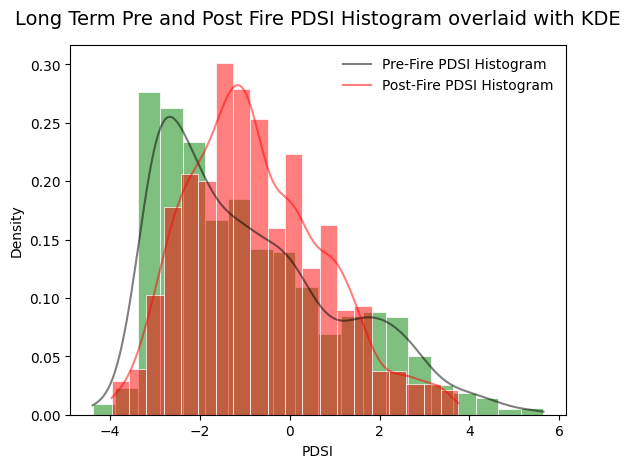

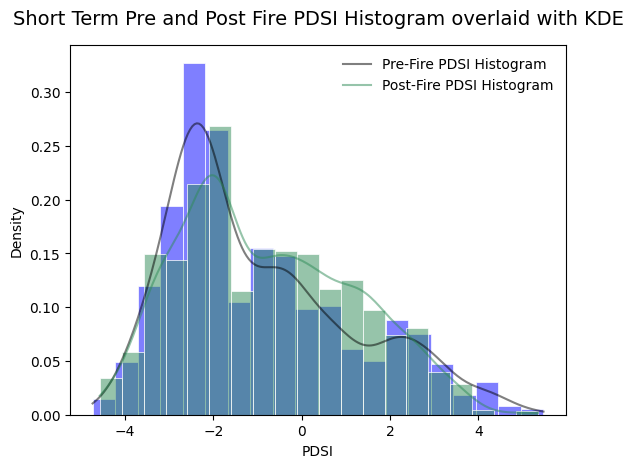

In [ ]:
# Scatter plots for Dead Trees
plot_hist(df_FTM_FINAL['PrevYr_PDSI'],df_FTM_FINAL['Yr2_PDSI'],'Long Term','colorset1')
plot_hist(df_FTM_FINAL['PrevYr_H2_PDSI'],df_FTM_FINAL['Yr1_H1_PDSI'],'Short Term','colorset2')

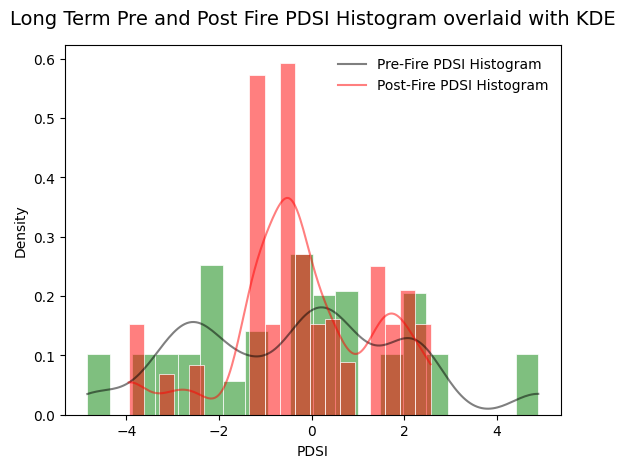

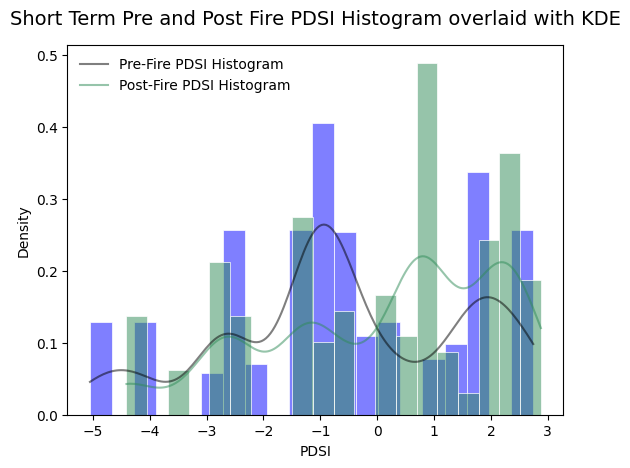

In [ ]:
# Scatter plots for Alive Trees
plot_hist(df_FTM_FINAL_2['PrevYr_PDSI'],df_FTM_FINAL_2['Yr2_PDSI'],'Long Term','colorset1')
plot_hist(df_FTM_FINAL_2['PrevYr_H2_PDSI'],df_FTM_FINAL_2['Yr1_H1_PDSI'],'Short Term','colorset2')

**NBR Boxplot**

In [ ]:
tmp = df_FTM_FINAL[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR']].copy()

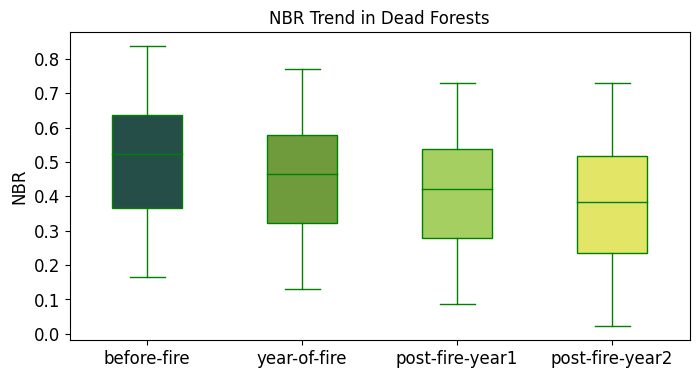

In [ ]:
ax = tmp.boxplot(figsize=(8, 4), whis=0.75,
                                     patch_artist=True,showfliers=False,
                                     vert=True, fontsize=12,color='green',
                                     return_type='both')

ax[0].set_ylabel("NBR", fontsize=12)
ax[0].set_title("NBR Trend in Dead Forests", fontsize=12);
ax[0].set_xticklabels(["before-fire", "year-of-fire","post-fire-year1", "post-fire-year2"])
ax[0].grid(False)

colors = ['#264E49', '#6F9B3C', '#A5CF61', '#E3E566']

for patch, color in zip(ax[1]['boxes'], colors):
    patch.set_facecolor(color)

**PDSI Trend**

In [ ]:
tmp2 = df_FTM_FINAL[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI']].copy()

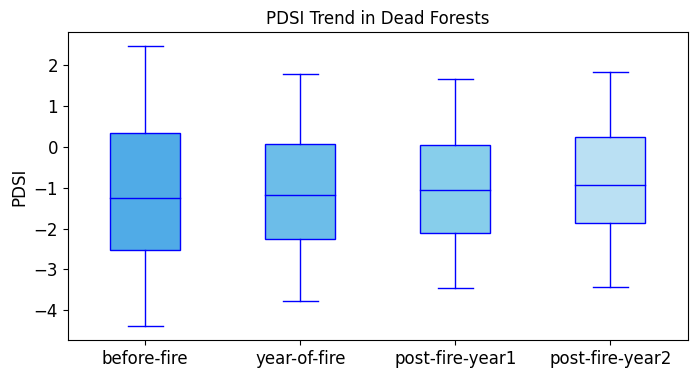

In [ ]:
ax = tmp2.boxplot(figsize=(8, 4), whis=0.75,
                                     patch_artist=True,showfliers=False,
                                     vert=True, fontsize=12,color='blue',
                                     return_type='both')

ax[0].set_ylabel("PDSI", fontsize=12)
ax[0].set_title("PDSI Trend in Dead Forests", fontsize=12);
ax[0].set_xticklabels(["before-fire", "year-of-fire","post-fire-year1", "post-fire-year2"])
ax[0].grid(False)

colors = ['#50ABE7', '#6CBDE9', '#87CEEB', '#BAE0F3']

for patch, color in zip(ax[1]['boxes'], colors):
    patch.set_facecolor(color)

# Model Development and Validation

In [ ]:
df_FTM_FINAL_Combined = df_FTM_FINAL.append(df_FTM_FINAL_2, ignore_index=True)

<ipython-input-6-602c78e226ca>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_FTM_FINAL_Combined = df_FTM_FINAL.append(df_FTM_FINAL_2, ignore_index=True)


In [ ]:
df_FTM_FINAL_Combined.head(1)

,YrFireName,uid,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,...,Yr0_H1_NBR,Yr0_H2_NBR,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_ST,NBR_min_ST,RdNBR_ST,tree_status
0,1988 - Air Patrol,47018564,-0.097345,-0.890418,-2.063191,-1.757568,0.361853,-0.748866,-0.615502,-2.8624,...,-0.019597,-0.03345,-0.024632,0.017268,-0.045801,0.092695,2.062042,-0.045801,3.688584,1.0


# Step1: Shortlist the attributes, normalize using min-max scaler, split 80:20 for train:test

In [ ]:
df_FTM_FINAL_Combined.columns

Index(['YrFireName', 'uid', 'PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',
       'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',
       'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR', 'dNBR_LT', 'NBR_min_LT',
       'RdNBR_LT', 'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR',
       'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',
       'dNBR_ST', 'NBR_min_ST', 'RdNBR_ST', 'tree_status'],
      dtype='object')

In [ ]:
df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',
       'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',
       'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR', 'dNBR_LT', 'NBR_min_LT',
       'RdNBR_LT', 'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR',
       'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',
       'dNBR_ST', 'NBR_min_ST', 'RdNBR_ST', 'tree_status']].copy()

In [ ]:
# Function for scatter plots
def get_test_train_data(df_FTM_Pred):
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import MinMaxScaler
  import numpy as np

  #Split into X/y
  X = df_FTM_Pred.drop('tree_status',axis=1)
  y = df_FTM_Pred['tree_status']

  scaler = MinMaxScaler()
  X_scaler = scaler.fit_transform(X)

  #Split into training and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  return X_train, X_test, y_train, y_test

In [ ]:
#sklearn classification models
def train_test_models(X_train, X_test, y_train, y_test):
  from sklearn.svm import SVC
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import precision_score, recall_score, f1_score
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, r2_score
  ##---------------------------------------------------------------------##
  # Create a SVC model
  #svc_classifier = SVC(kernel='linear', C=1.0)
  svc_classifier = SVC(kernel='rbf')
  svc_classifier.fit(X_train, y_train)
  sv_y_pred = svc_classifier.predict(X_test)

  sv_accuracy = accuracy_score(y_test, sv_y_pred)
  sv_conf_matrix = confusion_matrix(y_test, sv_y_pred)
  sv_precision = precision_score(y_test, sv_y_pred, average='weighted')
  sv_recall = recall_score(y_test, sv_y_pred, average='weighted')
  sv_f1 = f1_score(y_test, sv_y_pred, average='weighted')
  ##---------------------------------------------------------------------##
  # Create Random Forest Classifier
  random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
  random_forest.fit(X_train, y_train)
  rf_y_pred = random_forest.predict(X_test)

  rf_accuracy = accuracy_score(y_test, rf_y_pred)
  rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
  rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
  rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
  rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
  ##---------------------------------------------------------------------##
  # Create KNeighbors Classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=5)
  knn_classifier.fit(X_train, y_train)
  knn_y_pred = knn_classifier.predict(X_test)

  knn_accuracy = accuracy_score(y_test, knn_y_pred)
  knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
  knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
  knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
  knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
  ##---------------------------------------------------------------------##
  # Create Decision Tree Classifier
  dt_classifier = DecisionTreeClassifier()
  dt_classifier.fit(X_train, y_train)
  dt_y_pred = dt_classifier.predict(X_test)

  dt_accuracy = accuracy_score(y_test, dt_y_pred)
  dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
  dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
  dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
  dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
  ##---------------------------------------------------------------------##

  # Decision on the best model based on evaluation metrics
  #print("Results:")
  #print("SVC Accuracy:", sv_accuracy)
  #print("Random Forest Accuracy:", rf_accuracy)
  #print("KNN Accuracy:", knn_accuracy)
  #print("Decision Tree Accuracy:", dt_accuracy)
  #best_model = max([(sv_accuracy, "SVC"), (rf_accuracy, "Random Forest"), (knn_accuracy, "KNeighbors"), (dt_accuracy, "Decision Tree")])
  #print(f"The best model is {best_model[1]} with an accuracy of {best_model[0]}")
  #print(rf_conf_matrix)
  return sv_accuracy, rf_accuracy, knn_accuracy, dt_accuracy

# Trial 1: Raw Long Term PDSI and NBR values

In [ ]:
df_FTM_Pred_1 = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'tree_status']].copy()
df_FTM_Pred_1.sample(1)

,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_NBR,Yr0_NBR,Yr1_NBR,Yr2_NBR,tree_status
3295,-0.195332,0.211562,0.577849,0.305225,0.539604,0.486873,0.477488,0.481923,0.0


In [ ]:
X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_1)
train_test_models(X_train, X_test, y_train, y_test)

Results:
SVC Accuracy: 0.7225519287833828
Random Forest Accuracy: 0.9213649851632048
KNN Accuracy: 0.9287833827893175
Decision Tree Accuracy: 0.9169139465875371
The best model is KNeighbors with an accuracy of 0.9287833827893175
[[227   1   0]
 [  1 333   5]
 [  1  45  61]]


# Trial 2: Raw Short Term PDSI and NBR values

In [ ]:
df_FTM_Pred_2 = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'tree_status']].copy()
df_FTM_Pred_2.sample(1)

,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,Yr1_H1_PDSI,Yr1_H2_PDSI,Yr2_H1_PDSI,Yr2_H2_PDSI,PrevYr_H1_NBR,PrevYr_H2_NBR,Yr0_H1_NBR,Yr0_H2_NBR,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,tree_status
620,3.596501,1.867508,-1.731366,-3.062029,-3.323781,-3.117762,-2.453588,-1.571034,0.85699,0.643547,0.56321,0.595587,0.448888,0.520296,0.162511,0.266806,1.0


In [ ]:
X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_2)
train_test_models(X_train, X_test, y_train, y_test)

Results:
SVC Accuracy: 0.8308605341246291
Random Forest Accuracy: 0.9391691394658753
KNN Accuracy: 0.9599406528189911
Decision Tree Accuracy: 0.9332344213649851
The best model is KNeighbors with an accuracy of 0.9599406528189911
[[238   0   0]
 [  0 333   1]
 [  1  39  62]]


# Trial 3: Raw Long & Short Term PDSI and NBR values

In [ ]:
df_FTM_Pred_3 = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'tree_status']].copy()
df_FTM_Pred_3.sample(1)
X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_3)
train_test_models(X_train, X_test, y_train, y_test)

Results:
SVC Accuracy: 0.8471810089020771
Random Forest Accuracy: 0.9540059347181009
KNN Accuracy: 0.9718100890207715
Decision Tree Accuracy: 0.900593471810089
The best model is KNeighbors with an accuracy of 0.9718100890207715
[[242   0   0]
 [  0 335   1]
 [  1  29  66]]


# Trial 4: Long Term PDSI values

In [ ]:
df_FTM_Pred_4 = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'tree_status']].copy()
df_FTM_Pred_4.sample(1)
X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_4)
train_test_models(X_train, X_test, y_train, y_test)

Results:
SVC Accuracy: 0.7225519287833828
Random Forest Accuracy: 0.956973293768546
KNN Accuracy: 0.9480712166172107
Decision Tree Accuracy: 0.9391691394658753
The best model is Random Forest with an accuracy of 0.956973293768546
[[248   0   0]
 [  2 320   6]
 [  2  19  77]]


# Trial 5: Long Term NBR values

In [ ]:
df_FTM_Pred_5 = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'tree_status']].copy()
df_FTM_Pred_5.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_5)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.5786350148367952
Random Forest Accuracy: 0.5548961424332344
KNN Accuracy: 0.5830860534124629
Decision Tree Accuracy: 0.5
The best model is KNeighbors with an accuracy of 0.5830860534124629
[[142 100   4]
 [ 98 227  12]
 [ 24  62   5]]


# Trial 6: Long Term  and short term dNBR values

In [ ]:
df_FTM_Pred_6 = df_FTM_Pred[['dNBR_ST', 'dNBR_LT',      ## long term  & short term dNBR
                             'tree_status']].copy()
df_FTM_Pred_6.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_6)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.6810089020771514
Random Forest Accuracy: 0.6142433234421365
KNN Accuracy: 0.6394658753709199
Decision Tree Accuracy: 0.5519287833827893
The best model is SVC with an accuracy of 0.6810089020771514
[[164  76   7]
 [ 58 244  36]
 [ 14  69   6]]


# Trial 7: Long Term  and short term RdNBR values

In [ ]:
df_FTM_Pred_7 = df_FTM_Pred[['RdNBR_ST', 'RdNBR_LT',      ## long term  & short term dNBR
                             'tree_status']].copy()
df_FTM_Pred_7.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_7)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.5786350148367952
Random Forest Accuracy: 0.6142433234421365
KNN Accuracy: 0.6083086053412463
Decision Tree Accuracy: 0.5474777448071216
The best model is Random Forest with an accuracy of 0.6142433234421365
[[164  67   6]
 [ 79 244  20]
 [ 20  68   6]]


# Trial 8: Long Term dNBR and RdNBR values

In [ ]:
df_FTM_Pred_8 = df_FTM_Pred[['dNBR_LT', 'RdNBR_LT',      ## long term  & short term dNBR
                             'tree_status']].copy()
df_FTM_Pred_8.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_8)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.5608308605341247
Random Forest Accuracy: 0.5192878338278932
KNN Accuracy: 0.5459940652818991
Decision Tree Accuracy: 0.47774480712166173
The best model is SVC with an accuracy of 0.5608308605341247
[[125  94  20]
 [ 94 211  26]
 [ 31  59  14]]


# Trial 9: Short Term dNBR and RdNBR values

In [ ]:
df_FTM_Pred_9 = df_FTM_Pred[['dNBR_ST', 'RdNBR_ST',      ## long term  & short term dNBR
                             'tree_status']].copy()
df_FTM_Pred_9.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_9)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.5964391691394659
Random Forest Accuracy: 0.5519287833827893
KNN Accuracy: 0.5474777448071216
Decision Tree Accuracy: 0.5029673590504451
The best model is SVC with an accuracy of 0.5964391691394659
[[145  72  18]
 [ 89 220  33]
 [ 37  53   7]]


# Trial 10: Long term and Short Term dNBR and RdNBR values

In [ ]:
df_FTM_Pred_10 = df_FTM_Pred[['dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term  & short term dNBR & RdNBR
                             'tree_status']].copy()
df_FTM_Pred_10.sample(1)

X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_10)
train_test_models(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
SVC Accuracy: 0.7091988130563798
Random Forest Accuracy: 0.7225519287833828
KNN Accuracy: 0.7136498516320475
Decision Tree Accuracy: 0.6305637982195845
The best model is Random Forest with an accuracy of 0.7225519287833828
[[198  38   5]
 [ 33 280  27]
 [ 14  70   9]]


# All Trials

In [ ]:
column_names = ['Trial_name', 'sv_accuracy', 'rf_accuracy', 'knn_accuracy', 'dt_accuracy']
df_Trials = pd.DataFrame(columns=column_names)

In [ ]:
#df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
#                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
#                             'tree_status']].copy()

#X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_T)
#sv_accuracy, rf_accuracy, knn_accuracy, dt_accuracy = train_test_models(X_train, X_test, y_train, y_test)
#trail_name = '4yr long term PDSI + 4yr long term NBR'
#df_Trials = pd.concat([pd.DataFrame([[trail_name, sv_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]], columns=df_Trials.columns), df_Trials], ignore_index=True)

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy


In [ ]:
def call_model(df_FTM_Pred_T, trail_name):
  X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_T)
  sv_accuracy, rf_accuracy, knn_accuracy, dt_accuracy = train_test_models(X_train, X_test, y_train, y_test)
  global df_Trials
  df_Trials = pd.concat([pd.DataFrame([[trail_name, sv_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]], columns=df_Trials.columns), df_Trials], ignore_index=True)

In [ ]:
trail_name = '4yr long term PDSI + 4yr long term NBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr short term PDSI + 4yr short term NBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr long term and short term PDSI + 4yr long term and short term NBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr long term PDSI'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr short term PDSI'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr long term NBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr short term NBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr short term NBR,0.778932,0.804154,0.781899,0.698813
1,4yr long term NBR,0.531157,0.562315,0.557864,0.494065
2,4yr short term PDSI,0.845697,0.970326,0.964392,0.954006
3,4yr long term PDSI,0.731454,0.961424,0.934718,0.952522
4,4yr long term and short term PDSI + 4yr long t...,0.851632,0.965875,0.967359,0.934718
5,4yr short term PDSI + 4yr short term NBR,0.850148,0.942136,0.970326,0.910979
6,4yr long term PDSI + 4yr long term NBR,0.718101,0.918398,0.934718,0.916914


In [ ]:
trail_name = 'long and short term dNBR'
df_FTM_Pred_T = df_FTM_Pred[['dNBR_LT', 'dNBR_ST',      ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = 'long and short term RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = 'long term dNBR and long term RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = 'short term dNBR and short term RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = 'long and short term dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,long and short term dNBR and RdNBR,0.691395,0.688427,0.692878,0.596439
1,short term dNBR and short term RdNBR,0.593472,0.550445,0.541543,0.517804
2,long term dNBR and long term RdNBR,0.574184,0.548961,0.557864,0.492582
3,long and short term RdNBR,0.618694,0.593472,0.602374,0.544510
4,long and short term dNBR,0.649852,0.642433,0.661721,0.578635
5,4yr short term NBR,0.778932,0.804154,0.781899,0.698813
6,4yr long term NBR,0.531157,0.562315,0.557864,0.494065
7,4yr short term PDSI,0.845697,0.970326,0.964392,0.954006
8,4yr long term PDSI,0.731454,0.961424,0.934718,0.952522
9,4yr long term and short term PDSI + 4yr long t...,0.851632,0.965875,0.967359,0.934718


In [ ]:
trail_name = '4yr LT PDSI + 4yr LT NBR + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                              'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                              'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr ST PDSI + 4yr ST NBR + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                              'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                              'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr ST NBR + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr LT PDSI + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr ST PDSI + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr LT NBR + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr ST NBR + LT and ST dNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_LT', 'dNBR_ST',                               ## long term & short term dNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr ST NBR + LT and ST dNBR,0.608309,0.792285,0.683976,0.682493
1,4yr LT NBR + LT and ST dNBR,0.606825,0.734421,0.658754,0.657270
2,4yr ST PDSI + LT and ST dNBR,0.709199,0.970326,0.896142,0.940653
3,4yr LT PDSI + LT and ST dNBR,0.678042,0.945104,0.808605,0.890208
4,4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr S...,0.701780,0.928783,0.870920,0.899110
5,4yr ST PDSI + 4yr ST NBR + LT and ST dNBR,0.695846,0.945104,0.872404,0.918398
6,4yr LT PDSI + 4yr LT NBR + LT and ST dNBR,0.688427,0.905045,0.813056,0.862018
7,long and short term dNBR and RdNBR,0.691395,0.688427,0.692878,0.596439
8,short term dNBR and short term RdNBR,0.593472,0.550445,0.541543,0.517804
9,long term dNBR and long term RdNBR,0.574184,0.548961,0.557864,0.492582


In [ ]:
trail_name = '4yr LT PDSI + 4yr LT NBR + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                              'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                              'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + 4yr ST NBR + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                              'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                              'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr ST NBR + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT NBR + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST NBR + LT and ST RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'RdNBR_LT', 'RdNBR_ST',    ## long term & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr ST NBR + LT and ST RdNBR,0.532641,0.805638,0.654303,0.701780
1,4yr LT NBR + LT and ST RdNBR,0.543027,0.683976,0.614243,0.600890
2,4yr ST PDSI + LT and ST RdNBR,0.652819,0.971810,0.854599,0.942136
3,4yr LT PDSI + LT and ST RdNBR,0.626113,0.942136,0.787834,0.915430
4,4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr S...,0.703264,0.955490,0.870920,0.908012
5,4yr ST PDSI + 4yr ST NBR + LT and ST RdNBR,0.670623,0.939169,0.853116,0.913947
6,4yr LT PDSI + 4yr LT NBR + LT and ST RdNBR,0.618694,0.912463,0.781899,0.856083
7,4yr ST NBR + LT and ST dNBR,0.608309,0.792285,0.683976,0.682493
8,4yr LT NBR + LT and ST dNBR,0.606825,0.734421,0.658754,0.657270
9,4yr ST PDSI + LT and ST dNBR,0.709199,0.970326,0.896142,0.940653


In [ ]:
trail_name = '4yr LT PDSI + 4yr LT NBR + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                              'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                              'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + 4yr ST NBR + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                              'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                              'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr ST NBR + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT NBR + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST NBR + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr ST NBR + LT dNBR and RdNBR,0.587537,0.801187,0.661721,0.678042
1,4yr LT NBR + LT dNBR and RdNBR,0.547478,0.603858,0.562315,0.525223
2,4yr ST PDSI + LT dNBR and RdNBR,0.640950,0.979228,0.867953,0.943620
3,4yr LT PDSI + LT dNBR and RdNBR,0.614243,0.942136,0.777448,0.881306
4,4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr S...,0.658754,0.948071,0.888724,0.902077
5,4yr ST PDSI + 4yr ST NBR + LT dNBR and RdNBR,0.633531,0.958457,0.891691,0.936202
6,4yr LT PDSI + 4yr LT NBR + LT dNBR and RdNBR,0.569733,0.906528,0.771513,0.875371
7,4yr ST NBR + LT and ST RdNBR,0.532641,0.805638,0.654303,0.701780
8,4yr LT NBR + LT and ST RdNBR,0.543027,0.683976,0.614243,0.600890
9,4yr ST PDSI + LT and ST RdNBR,0.652819,0.971810,0.854599,0.942136


In [ ]:
trail_name = '4yr LT PDSI + 4yr LT NBR + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                              'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                              'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + 4yr ST NBR + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                              'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                              'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT and ST PDSI + 4yr LT and ST NBR + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT NBR + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST NBR + ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_ST', 'RdNBR_ST',     ## short term dNBR & short term RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr ST NBR + ST dNBR and RdNBR,0.626113,0.804154,0.630564,0.701780
1,4yr LT NBR + ST dNBR and RdNBR,0.599407,0.721068,0.566766,0.629080
2,4yr ST PDSI + ST dNBR and RdNBR,0.694362,0.964392,0.851632,0.921365
3,4yr LT PDSI + ST dNBR and RdNBR,0.655786,0.948071,0.804154,0.903561
4,4yr LT and ST PDSI + 4yr LT and ST NBR + ST dN...,0.682493,0.955490,0.856083,0.922849
5,4yr ST PDSI + 4yr ST NBR + ST dNBR and RdNBR,0.686944,0.945104,0.856083,0.899110
6,4yr LT PDSI + 4yr LT NBR + ST dNBR and RdNBR,0.646884,0.930267,0.789318,0.862018
7,4yr ST NBR + LT dNBR and RdNBR,0.587537,0.801187,0.661721,0.678042
8,4yr LT NBR + LT dNBR and RdNBR,0.547478,0.603858,0.562315,0.525223
9,4yr ST PDSI + LT dNBR and RdNBR,0.640950,0.979228,0.867953,0.943620


In [ ]:
trail_name = '4yr LT PDSI + 4yr LT NBR + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                              'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                              'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr ST PDSI + 4yr ST NBR + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                              'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                              'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                              'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr ST NBR + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr LT PDSI + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',  ## 4 yrs of long term PDSI
                             'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

trail_name = '4yr ST PDSI + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr LT NBR + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR',      ## 4 yrs of long term NBR
                             'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)


trail_name = '4yr ST NBR + LT and ST dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_NBR', 'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR', 'Yr2_H1_NBR', 'Yr2_H2_NBR',          ## 4 yrs of short term NBR
                             'dNBR_ST', 'RdNBR_ST', 'dNBR_LT', 'RdNBR_LT',      ## long term & short term dNBR & RdNBR
                             'tree_status']].copy()
call_model(df_FTM_Pred_T, trail_name)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_Trials

,Trial_name,sv_accuracy,rf_accuracy,knn_accuracy,dt_accuracy
0,4yr ST NBR + LT and ST dNBR and RdNBR,0.660237,0.787834,0.698813,0.670623
1,4yr LT NBR + LT and ST dNBR and RdNBR,0.679525,0.753709,0.707715,0.660237
2,4yr ST PDSI + LT and ST dNBR and RdNBR,0.661721,0.973294,0.863501,0.942136
3,4yr LT PDSI + LT and ST dNBR and RdNBR,0.661721,0.916914,0.816024,0.894659
4,4yr LT PDSI + 4yr LT NBR + 4yr ST PDSI + 4yr S...,0.679525,0.940653,0.878338,0.890208
5,4yr ST PDSI + 4yr ST NBR + LT and ST dNBR and ...,0.710682,0.956973,0.857567,0.916914
6,4yr LT PDSI + 4yr LT NBR + LT and ST dNBR and ...,0.667656,0.905045,0.816024,0.860534
7,4yr ST NBR + ST dNBR and RdNBR,0.626113,0.804154,0.630564,0.701780
8,4yr LT NBR + ST dNBR and RdNBR,0.599407,0.721068,0.566766,0.629080
9,4yr ST PDSI + ST dNBR and RdNBR,0.694362,0.964392,0.851632,0.921365


In [ ]:
file_path = '/content/drive/My Drive/df_Trials.csv'
df_Trials.to_csv(file_path, index=False)

In [ ]:
df_Trials.max()

Trial_name      short term dNBR and short term RdNBR
sv_accuracy                                 0.851632
rf_accuracy                                 0.979228
knn_accuracy                                0.970326
dt_accuracy                                 0.954006
dtype: object

In [ ]:
max_index = df_Trials['rf_accuracy'].idxmax()
df_Trials.loc[max_index]

Trial_name      4yr ST PDSI + LT dNBR and RdNBR
sv_accuracy                             0.64095
rf_accuracy                            0.979228
knn_accuracy                           0.867953
dt_accuracy                             0.94362
Name: 16, dtype: object

# **Shortlisted Combination of Attributes (Highest Accuracy)**

In [ ]:
trail_name = '4yr ST PDSI + LT dNBR and RdNBR'
df_FTM_Pred_T = df_FTM_Pred[['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI', 'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',  ## 4 yrs of short term PDSI
                             'dNBR_LT', 'RdNBR_LT',     ## long term dNBR & long term RdNBR
                             'tree_status']].copy()

In [ ]:
X_train, X_test, y_train, y_test = get_test_train_data(df_FTM_Pred_T)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'PrevYr_H1_PDSI'),
  Text(0, 1.5, 'PrevYr_H2_PDSI'),
  Text(0, 2.5, 'Yr0_H1_PDSI'),
  Text(0, 3.5, 'Yr0_H2_PDSI'),
  Text(0, 4.5, 'Yr1_H1_PDSI'),
  Text(0, 5.5, 'Yr1_H2_PDSI'),
  Text(0, 6.5, 'Yr2_H1_PDSI'),
  Text(0, 7.5, 'Yr2_H2_PDSI'),
  Text(0, 8.5, 'dNBR_LT'),
  Text(0, 9.5, 'RdNBR_LT')])

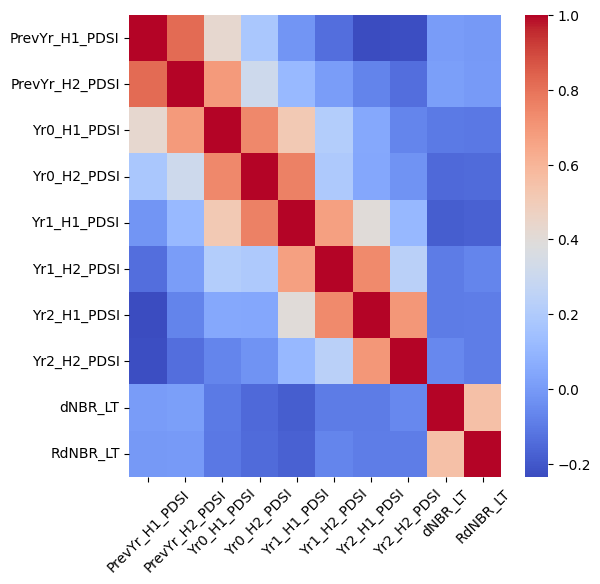

In [ ]:
# calculate the correlation matrix on the numeric columns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

corr = X_train.corr()

# plot the heatmap
sns.heatmap(corr,cmap='coolwarm',annot=False)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [ ]:
#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','PrevYr_NBR','Yr0_NBR','Yr1_NBR','Yr2_NBR','dNBR','NBR_min','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.8502304147465438 ###without FTM2
#The best model is Random Forest with an accuracy of 0.9169139465875371 ###with FTM2
#The best model is Random Forest with an accuracy of 0.9035608308605341 ###with FTM2 with 3 class

#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR','NBR_min','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9262672811059908 ###without FTM2
#The best model is Random Forest with an accuracy of 0.9347181008902077 ###with FTM2
#The best model is Random Forest with an accuracy of 0.913946587537092  ###with FTM2 with 3 class

#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','dNBR','NBR_min','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.8732718894009217 ###without FTM2
#The best model is Random Forest with an accuracy of 0.8902077151335311 ###with FTM2
#The best model is Random Forest with an accuracy of 0.8813056379821959 ###with FTM2 with 3 class

#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','dNBR','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.8640552995391705 ###without FTM2
#The best model is Random Forest with an accuracy of 0.887240356083086  ###with FTM2
#The best model is Random Forest with an accuracy of 0.8887240356083086 ###with FTM2 with 3 class

#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','NBR_min','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.8783382789317508 ###with FTM2
#The best model is Random Forest with an accuracy of 0.9035608308605341 ###with FTM2 with 3 class

#df_FTM_Pred = df_FTM_FINAL[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','dNBR','RdNBR','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.93026706231454   ###with FTM2
#The best model is Random Forest with an accuracy of 0.9287833827893175 ###with FTM2 with 3 class

df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR_LT','RdNBR_LT','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9347181008902077 ###with FTM2
###The best model is Random Forest with an accuracy of 0.93026706231454 ###with FTM2 with 3 class
####The best model is Random Forest with an accuracy of 0.9480712166172107 ###with FTM2 with 3 class<<<<<<<<<<<<<<<<<<<<<<<<<<<
###The best model is Random Forest with an accuracy of 0.9317507418397626

#df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR_ST','RdNBR_ST','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9362017804154302

#df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR_LT','RdNBR_LT','dNBR_ST','RdNBR_ST','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9272997032640949

#df_FTM_Pred = df_FTM_FINAL_Combined.copy()
#df_FTM_Pred = df_FTM_Pred.drop(columns=['YrFireName','uid'])
#The best model is Random Forest with an accuracy of 0.9347181008902077

#df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','RdNBR_LT','RdNBR_ST','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9376854599406528

#df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR_LT','dNBR_ST','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9391691394658753
#The best model is Random Forest with an accuracy of 0.9228486646884273
#The best model is Random Forest with an accuracy of 0.9451038575667656 with 3 class<<<<<<<<<<<<<<<<<<<<<<<<<<<

#df_FTM_Pred = df_FTM_FINAL_Combined[['PrevYr_PDSI','Yr1_PDSI','dNBR_LT','dNBR_ST','tree_status']].copy()
#The best model is Random Forest with an accuracy of 0.9124629080118695

In [ ]:
df_FTM_Pred.sample(1)

,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,dNBR_LT,RdNBR_LT,tree_status
465,2.47386,4.345916,3.531584,0.573335,-25.864034,-25.770602,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Split into X/y
X = df_FTM_Pred.drop('tree_status',axis=1)
y = df_FTM_Pred['tree_status']

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'PrevYr_PDSI'),
  Text(0, 1.5, 'Yr0_PDSI'),
  Text(0, 2.5, 'Yr1_PDSI'),
  Text(0, 3.5, 'Yr2_PDSI'),
  Text(0, 4.5, 'dNBR_LT'),
  Text(0, 5.5, 'RdNBR_LT')])

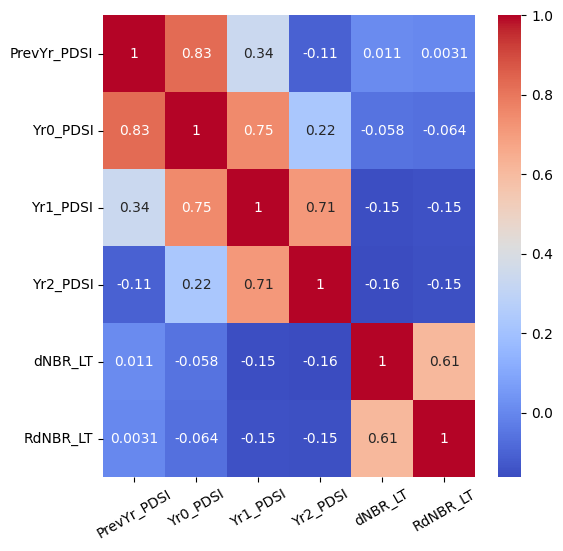

In [ ]:
# calculate the correlation matrix on the numeric columns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

corr = X.corr()

# plot the heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
#sns.set(font_scale=0.8)

# Step 2: Train and Validate 4 different SKLearn classifiers
- LogisticRegression
- RandomForestClassifier
- KNeighborsClassifier
- DecisionTreeClassifier


In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, r2_score
##---------------------------------------------------------------------##
# Create a SVC model
#svc_classifier = SVC(kernel='linear', C=1.0)
svc_classifier = SVC(kernel='rbf')

svc_classifier.fit(X_train, y_train)
sv_y_pred = svc_classifier.predict(X_test)

# Calculate accuracy
sv_accuracy = accuracy_score(y_test, sv_y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, sv_y_pred)
# Calculate precision, recall, and F1 score
sv_precision = precision_score(y_test, sv_y_pred, average='weighted')
sv_recall = recall_score(y_test, sv_y_pred, average='weighted')
sv_f1 = f1_score(y_test, sv_y_pred, average='weighted')
##---------------------------------------------------------------------##
# Create Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_y_pred = random_forest.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
# Generate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
# Calculate precision, recall, and F1 score
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
##---------------------------------------------------------------------##

# Create KNeighbors Classifier
neigh_classifier = KNeighborsClassifier(n_neighbors=5)
neigh_classifier.fit(X_train, y_train)
neigh_y_pred = neigh_classifier.predict(X_test)

# Evaluate KNeighbors Classifier
neigh_accuracy = accuracy_score(y_test, neigh_y_pred)
# Generate confusion matrix
neigh_conf_matrix = confusion_matrix(y_test, neigh_y_pred)
# Calculate precision, recall, and F1 score
neigh_precision = precision_score(y_test, neigh_y_pred, average='weighted')
neigh_recall = recall_score(y_test, neigh_y_pred, average='weighted')
neigh_f1 = f1_score(y_test, neigh_y_pred, average='weighted')
##---------------------------------------------------------------------##

# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
# Generate confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
# Calculate precision, recall, and F1 score
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
##---------------------------------------------------------------------##
# Create a detailed comparison report
print("Detailed Comparison Report:")
print("=====================================")
#print("Logistic Regression Results:")
#print(f"Accuracy: {lr_accuracy}")
#print(f"Precision: {lr_precision:.4f}")
#print(f"Recall: {lr_recall:.4f}")
#print(f"F1 Score: {lr_f1:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
print("=====================================")
print("SVC Results:")
print(f"Accuracy: {sv_accuracy}")
print(f"Precision: {sv_precision:.4f}")
print(f"Recall: {sv_recall:.4f}")
print(f"F1 Score: {sv_f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("=====================================")
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print("=====================================")
print("KNeighbors Results:")
print(f"Accuracy: {neigh_accuracy}")
print(f"Precision: {neigh_precision:.4f}")
print(f"Recall: {neigh_recall:.4f}")
print(f"F1 Score: {neigh_f1:.4f}")
print(f"Confusion Matrix:\n{neigh_conf_matrix}")
print("=====================================")

print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"Confusion Matrix:\n{dt_conf_matrix}")
print("=====================================")

# Decision on the best model based on evaluation metrics
best_model = max([(sv_accuracy, "SVC"), (rf_accuracy, "Random Forest"), (neigh_accuracy, "KNeighbors"), (dt_accuracy, "Decision Tree")])
#best_model = max([(lr_accuracy, "Logistic Regression"), (rf_accuracy, "Random Forest"), (neigh_accuracy, "KNeighbors")])

print(f"The best model is {best_model[1]} with an accuracy of {best_model[0]}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Detailed Comparison Report:
SVC Results:
Accuracy: 0.629080118694362
Precision: 0.5381
Recall: 0.6291
F1 Score: 0.5800
Confusion Matrix:
[[152  75   0]
 [ 78 272   0]
 [ 31  66   0]]
Random Forest Results:
Accuracy: 0.9821958456973294
Precision: 0.9825
Recall: 0.9822
F1 Score: 0.9818
Confusion Matrix:
[[227   0   0]
 [  0 349   1]
 [  0  11  86]]
KNeighbors Results:
Accuracy: 0.8560830860534124
Precision: 0.8507
Recall: 0.8561
F1 Score: 0.8498
Confusion Matrix:
[[225   2   0]
 [ 28 301  21]
 [  8  38  51]]
Decision Tree Results:
Accuracy: 0.9406528189910979
Precision: 0.9427
Recall: 0.9407
F1 Score: 0.9413
Confusion Matrix:
[[227   0   0]
 [  2 325  23]
 [  3  12  82]]
The best model is Random Forest with an accuracy of 0.9821958456973294


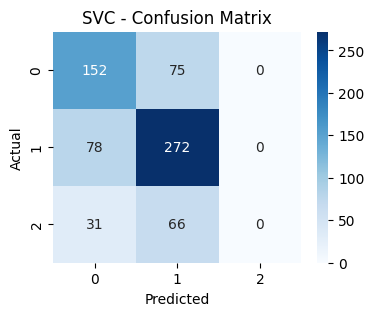

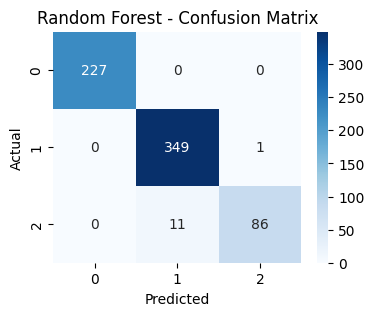

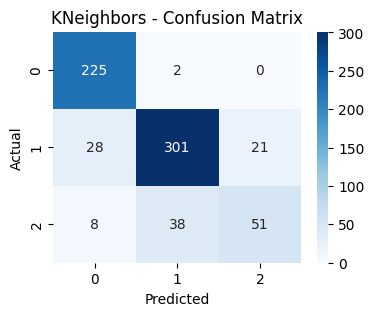

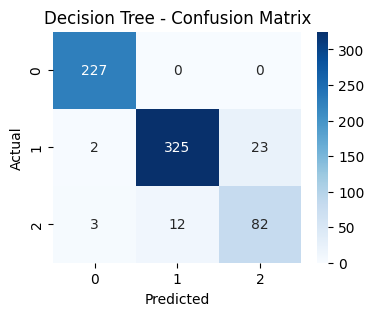

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Logistic Regression
#plot_confusion_matrix(conf_matrix, "Logistic Regression - Confusion Matrix")

# Plot confusion matrix for SVC
plot_confusion_matrix(conf_matrix, "SVC - Confusion Matrix")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_conf_matrix, "Random Forest - Confusion Matrix")

# Plot confusion matrix for K Nearest Neighbors
plot_confusion_matrix(neigh_conf_matrix, "KNeighbors - Confusion Matrix")

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(dt_conf_matrix, "Decision Tree - Confusion Matrix")

In [ ]:
X_train.columns

Index(['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI', 'dNBR_LT',
       'RdNBR_LT'],
      dtype='object')

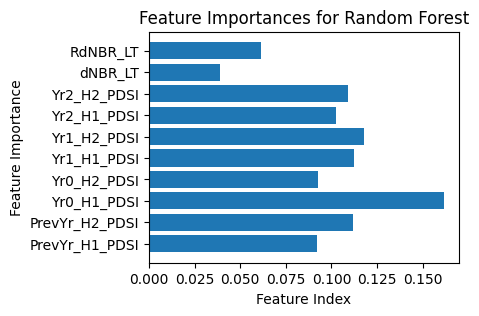

In [ ]:
# Get feature importances
feature_importance = random_forest.feature_importances_
feature_names = ['PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI', 'dNBR_LT',
       'RdNBR_LT']
# Plotting feature importances
plt.figure(figsize=(4, 3))
#plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.barh(feature_names, feature_importance, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Random Forest')
plt.show()



# Case Study: Dixie Fire
**963,309 Acres | 5 Counties: Butte, Plumas, Shasta, Lassen, Tehama**

https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire
https://sierranevada.ca.gov/2021-another-historic-sierra-nevada-fire-season/#:~:text=In%202021%2C%20the%20Dixie%20Fire,and%20down%20the%20eastern%20side.
https://sierranevada.ca.gov/snc-launches-25-million-grant-round-funds-giant-sequoia-restoration-project/

# Get sample points from Dixie Wildfires area
https://www.fs.usda.gov/sites/default/files/wcs-landscape-factsheet.pdf
https://www.fs.usda.gov/sites/default/files/Confronting-Wildfire-Crisis.pdf


In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='210313089991')
import pandas as pd
import altair as alt
import numpy as np
import folium
import requests
import json
import geopandas as gpd
import seaborn as sns

In [ ]:
def create_reduce_region_function(geometry,
                                  reducer=ee.Reducer.mean(),
                                  scale=5000,
                                  crs='EPSG:4326',
                                  bestEffort=True,
                                  maxPixels=1e13,
                                  tileScale=4):
  def reduce_region_function(img):
    stat = img.reduceRegion(
        reducer=reducer,
        geometry=geometry,
        scale=scale,
        crs=crs,
        bestEffort=bestEffort,
        maxPixels=maxPixels,
        tileScale=tileScale)

    return ee.Feature(geometry, stat).set({'millis': img.date().millis()})
  return reduce_region_function

In [ ]:
# Define a function to transfer feature properties to a dictionary.
def fc_to_dict(fc):
  prop_names = fc.first().propertyNames()
  prop_lists = fc.reduceColumns(
      reducer=ee.Reducer.toList().repeat(prop_names.size()),
      selectors=prop_names).get('list')

  return ee.Dictionary.fromLists(prop_names, prop_lists)

In [ ]:
# Function to add date variables to DataFrame.
def add_date_info(df):
  df['Timestamp'] = pd.to_datetime(df['millis'], unit='ms')
  df['Year'] = pd.DatetimeIndex(df['Timestamp']).year
  df['Month'] = pd.DatetimeIndex(df['Timestamp']).month
  return df

In [ ]:
def get_pdsi_collection(yr):
  fire_yr = ee.Date(pd.to_datetime(yr))
  ## -1 indicate previous year data and 3 indicates 3 years starting from year of Fire
  ## For example for Fire that happened in 2001, below statement would fetch data for 2000, 2001, 2002 & 2003
  date_range = ee.DateRange(fire_yr.advance(-1, 'years'), fire_yr.advance(3, 'years'))
  pdsi = ee.ImageCollection('GRIDMET/DROUGHT').filterDate(date_range).select('pdsi')
  return pdsi

def get_pdsi(pdsi,aoi):
  reduce_pdsi = create_reduce_region_function(
    geometry=aoi, reducer=ee.Reducer.mean(), scale=5000, crs='EPSG:3310')

  pdsi_stat_fc = ee.FeatureCollection(pdsi.map(reduce_pdsi)).filter(
    ee.Filter.notNull(pdsi.first().bandNames()))

  pdsi_dict = fc_to_dict(pdsi_stat_fc).getInfo()
  pdsi_df = pd.DataFrame(pdsi_dict)
  pdsi_df = add_date_info(pdsi_df)
  pdsi_df = pdsi_df.rename(columns={
    'pdsi': 'PDSI'
  }).drop(columns=['millis', 'system:index'])
  return pdsi_df

In [ ]:
#https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire
# Dixie Fire : 5 Counties: Butte, Plumas, Shasta, Lassen, Tehama
# Date Started: 07/13/2021
# Date Contained: 10/25/2021
# Area burned: 963,309 Acres
# Location: 39.871306,-121.389439

Dixie_Fire_CA = [['California', 39.871306,-121.389439]]
df_Dixie_Fire_CA = pd.DataFrame(Dixie_Fire_CA)
df_Dixie_Fire_CA.columns = ['State','Latitude','Longitude']
df_Dixie_Fire_CA.head(1)

,State,Latitude,Longitude
0,California,39.871306,-121.389439


In [ ]:
random_sample_lst = []
for index, row in df_Dixie_Fire_CA.iterrows():
    print(row['Longitude'], row['Latitude'])
    # Create a point of interest using the provided latitude and longitude
    point_of_interest = ee.Geometry.Point(row['Longitude'], row['Latitude'])

    # Define a region around the point of interest (10000 meters radius in this example)
    region = point_of_interest.buffer(10000)  # You can adjust the buffer size as needed

    random_points = ee.FeatureCollection.randomPoints(region=region, points=100, seed=0, maxError=1)
    #print(random_points.geometry().coordinates().getInfo())
    pt_dict = random_points.geometry().coordinates().getInfo()
    df_sample = pd.DataFrame(pt_dict)
    df_sample.columns = ['Longitude', 'Latitude']
    df_sample['State'] = row['State']
    df_sample['yr_fire'] = 2021
    random_sample_lst.append(df_sample)
pd.concat(random_sample_lst)

In [ ]:
df_sample = pd.concat(random_sample_lst)
df_sample = df_sample[['State','Latitude','Longitude','yr_fire']].copy()
df_sample.reset_index(inplace=True)
df_sample

,index,State,Latitude,Longitude,yr_fire
0,0,California,39.853727,-121.429498,2021
1,1,California,39.946572,-121.451479,2021
2,2,California,39.943413,-121.338720,2021
3,3,California,39.843963,-121.483353,2021
4,4,California,39.900751,-121.354822,2021
...,...,...,...,...,...
95,95,California,39.818462,-121.385548,2021
96,96,California,39.894951,-121.295981,2021
97,97,California,39.831343,-121.416022,2021
98,98,California,39.937202,-121.353343,2021


# Get PDSI for Dixie Fire Sample Points

In [ ]:
def check_existence(latitude, longitude, coordinates):
    return (latitude, longitude) in coordinates

coordinates_list  = []
for index, row in df_sample.iterrows():
    print('index:', index, '::', row['State'], row['Longitude'], row['Latitude'])
    if check_existence(row['Latitude'], row['Longitude'], coordinates_list):
        print(row['Latitude'], ' ', row['Longitude'], ' exists in the list.')
    #elif index < 393:
    #    print('index:', index)
    #elif row['YrFireName'] == '2010 - Gilles Creek':
    #    print('skipping....')
    #    print(row['YrFireName'])
    else:
        yr = str(int(row['yr_fire']))
        sample_point = ee.Geometry.Point(row['Longitude'], row['Latitude'])
        pdsi = get_pdsi_collection(yr)
        pdsi_df = get_pdsi(pdsi,sample_point)
        pdsi_df['YrFireName'] = 'Alive_Tree_Record'
        pdsi_df['Dataset'] = ''
        pdsi_df['yr_fire'] = row['yr_fire']
        pdsi_df['Longitude'] = row['Longitude']
        pdsi_df['Latitude'] = row['Latitude']
        #frnm = 'Alive_Tree_Record'
        #st = str(row['State'])
        file_path = '/content/drive/My Drive/PDSI_FINAL/PDSI_' + str(index) + '_' + 'DIXIE_FIRE' + '.csv'
        pdsi_df.to_csv(file_path, index=False)
        coordinates_list.append((row['Latitude'],row['Longitude']))

index: 0 :: California -121.42949783172014 39.85372740409261
index: 1 :: California -121.45147925539274 39.94657184193215
index: 2 :: California -121.33871995121189 39.94341319426564
index: 3 :: California -121.48335300187615 39.843963442212264
index: 4 :: California -121.35482166346097 39.90075054505221
index: 5 :: California -121.30293268851948 39.852745426195916
index: 6 :: California -121.40731640554291 39.90274816002354
index: 7 :: California -121.39516443907429 39.9461188036694
index: 8 :: California -121.41541761546978 39.94029860317837
index: 9 :: California -121.42832560465234 39.91539256908431
index: 10 :: California -121.42859473283788 39.856603389976584
index: 11 :: California -121.37984533284698 39.87393716364675
index: 12 :: California -121.39117405301421 39.83363979206642
index: 13 :: California -121.37786528716902 39.93317435833227
index: 14 :: California -121.33909745371743 39.94873489518597
index: 15 :: California -121.480755307075 39.850886769922276
index: 16 :: Cali

In [ ]:
import os
import regex as re

#from google.colab import drive
#drive.mount('/content/drive')

# Define the folder path in your Google Drive where your files are stored
folder_path = '/content/drive/My Drive/PDSI_FINAL'

# List files in the folder that start with a certain string
#file_list = [file for file in os.listdir(folder_path) if file.startswith('99_PDSI_')]
file_list = [file for file in os.listdir(folder_path) if 'DIXIE_FIRE' in str(file)]

# Read all files into a Pandas DataFrame
dfs = []
i=1
for file_name in file_list:
    print(i,'..',file_name)
    file_path = os.path.join(folder_path, file_name)
    # Assuming files are CSV, change the read function accordingly for other formats
    df = pd.read_csv(file_path)

    df['uid'] = ((df['Latitude'] * 100000000) % 100000000).astype(int)
    df['Date'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d').dt.date
    df['YrFireName'] = 'DIXIE_FIRE_2021'
    df.index = pd.DatetimeIndex(df["Date"])
    df = df.sort_index()


    rolling_mean = df['PDSI'].rolling(window='730D',min_periods=1).mean()
    df['Rolling_Mean_2YR'] = rolling_mean

    annual_average_2years = df.groupby(['YrFireName','uid']).resample('Y')['Rolling_Mean_2YR'].mean().reset_index()
    tmp = pd.DataFrame(annual_average_2years)
    tmp = tmp.rename(columns={"Rolling_Mean_2YR": "Annual_Average_2Years"})
    tmp = tmp.sort_values(by=['YrFireName','uid','Date'])

    pivot = pd.pivot_table(tmp, values='Annual_Average_2Years',
                                index=['YrFireName', 'uid'],
                                columns=['Date'])

    namesList = ['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI']
    pivot.columns = pivot.columns[:0].tolist() + namesList
    pivot.reset_index(inplace=True)
    tmp_pivot1 = pd.merge(df,pivot,on=['YrFireName','uid'], how='inner').copy()
    #print(tmp_pivot1)

    rolling_mean_6MO = df['PDSI'].rolling(window='180D',min_periods=1).mean()
    df['Rolling_Mean_6MO'] = rolling_mean_6MO

    average_6months = df.groupby(['YrFireName','uid']).resample('180D')['Rolling_Mean_6MO'].mean().reset_index()
    tmp = pd.DataFrame(average_6months)
    tmp = tmp.rename(columns={"Rolling_Mean_6MO": "Average_6Months"})
    tmp = tmp.sort_values(by=['YrFireName','uid','Date'])

    pivot2 = pd.pivot_table(tmp, values='Average_6Months',
                                index=['YrFireName', 'uid'],
                                columns=['Date'])

    namesList = ['PrevYr_H1','PrevYr_H2','Yr0_H1','Yr0_H2','Yr1_H1','Yr1_H2','Yr2_H1','Yr2_H2','IGNORE']
    pivot2.columns = pivot2.columns[:0].tolist() + namesList
    pivot2.reset_index(inplace=True)
    tmp_pivot2 = pd.merge(df,pivot2,on=['YrFireName','uid'], how='inner').copy()
    #print(tmp_pivot2)

    tmp_pivot = pd.merge(tmp_pivot1,tmp_pivot2,on=['YrFireName','uid'], how='inner').copy()


    PDSI = tmp_pivot[['YrFireName','uid','PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','PrevYr_H1',
                            'PrevYr_H2','Yr0_H1','Yr0_H2','Yr1_H1','Yr1_H2','Yr2_H1','Yr2_H2']].copy()
    PDSI = PDSI.drop_duplicates()
    #print(PDSI)
    dfs.append(PDSI)
    i+=1
    #if i>20:
    #  break

# Concatenate all DataFrames
pdsi_combined_df = pd.concat(dfs, ignore_index=True)

# Display combined DataFrame
print(pdsi_combined_df.shape)

1 .. PDSI_0_DIXIE_FIRE.csv
2 .. PDSI_1_DIXIE_FIRE.csv
3 .. PDSI_2_DIXIE_FIRE.csv
4 .. PDSI_3_DIXIE_FIRE.csv
5 .. PDSI_4_DIXIE_FIRE.csv
6 .. PDSI_5_DIXIE_FIRE.csv
7 .. PDSI_6_DIXIE_FIRE.csv
8 .. PDSI_7_DIXIE_FIRE.csv
9 .. PDSI_8_DIXIE_FIRE.csv
10 .. PDSI_9_DIXIE_FIRE.csv
11 .. PDSI_10_DIXIE_FIRE.csv
12 .. PDSI_11_DIXIE_FIRE.csv
13 .. PDSI_12_DIXIE_FIRE.csv
14 .. PDSI_13_DIXIE_FIRE.csv
15 .. PDSI_14_DIXIE_FIRE.csv
16 .. PDSI_15_DIXIE_FIRE.csv
17 .. PDSI_16_DIXIE_FIRE.csv
18 .. PDSI_17_DIXIE_FIRE.csv
19 .. PDSI_18_DIXIE_FIRE.csv
20 .. PDSI_19_DIXIE_FIRE.csv
21 .. PDSI_20_DIXIE_FIRE.csv
22 .. PDSI_21_DIXIE_FIRE.csv
23 .. PDSI_22_DIXIE_FIRE.csv
24 .. PDSI_23_DIXIE_FIRE.csv
25 .. PDSI_24_DIXIE_FIRE.csv
26 .. PDSI_25_DIXIE_FIRE.csv
27 .. PDSI_26_DIXIE_FIRE.csv
28 .. PDSI_27_DIXIE_FIRE.csv
29 .. PDSI_28_DIXIE_FIRE.csv
30 .. PDSI_29_DIXIE_FIRE.csv
31 .. PDSI_30_DIXIE_FIRE.csv
32 .. PDSI_31_DIXIE_FIRE.csv
33 .. PDSI_32_DIXIE_FIRE.csv
34 .. PDSI_33_DIXIE_FIRE.csv
35 .. PDSI_34_DIXIE_FIRE.csv
36 .

In [ ]:
file_path = '/content/drive/My Drive/df_pdsi_annual_avg_DIXIE_FIRE.csv'
pdsi_combined_df.to_csv(file_path, index=False)

# Get NBR for Dixie Fire Sample Points

In [ ]:
'''
#############################################################################
## The below code block is Landsat Collection 1.
#############################################################################

def rename_oli(img):
  return (img.select(
      ee.List(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'pixel_qa']),
      ee.List(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2', 'pixel_qa'])))

# Define a function to get and rename bands of interest from ETM+.
def rename_etm(img):
  return (img.select(
      ee.List(['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'pixel_qa']),
      ee.List(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2', 'pixel_qa'])))

# Function to mask out clouds and cloud shadows
## The C Function of Mask (CFMask) algorithm populates cloud, cloud confidence, cloud shadow, and snow/ice pixels
## in the processing of Landsat Level-1 data products, with the results represented as bit-mapped values within
## the Landsat Collection 1 Level-1 Quality Assessment (QA) Band.
## https://www.usgs.gov/landsat-missions/cfmask-algorithm
def cfmask(img):
    cloud_shadow_bi_mask = 1 << 3
    cloud_bit_mask = 1 << 5
    qa = img.select('pixel_qa')
    mask = qa.bitwiseAnd(cloud_shadow_bi_mask).eq(0).And(
        qa.bitwiseAnd(cloud_bit_mask).eq(0))
    return img.updateMask(mask)

## OLI (Landsat's Operational Land Imager sensor)
## OLI measures in the visible, near infrared, and shortwave infrared portions (VNIR, NIR, and SWIR) of the spectrum.
## https://www.usgs.gov/landsat-missions/landsat-8?qt-science_support_page_related_con=0#qt-science_support_page_related_con
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR (Depricated)
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2 (superseded by)
def get_oli_col(aoi,date_range):
    print('in get_oli_col...')
    oli_col = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_oli))
    return oli_col

## ETM+ (Landsat's Enhanced Thematic Mapper Plus sensor)
## The ETM+ contains eight spectral bands, including a pan and thermal band:
## Band 1 Blue (0.45 - 0.52 µm) 30 m | Band 2 Green (0.52 - 0.60 µm) 30 m | Band 3 Red (0.63 - 0.69 µm) 30 m
## Band 4 Near-Infrared (0.77 - 0.90 µm) 30 m | Band 5 Short-wave Infrared (1.55 - 1.75 µm) 30 m | Band 6 Thermal (10.40 - 12.50 µm) 60 m Low Gain / High Gain
## Band 7 Mid-Infrared (2.08 - 2.35 µm) 30 m | Band 8 Panchromatic (PAN) (0.52 - 0.90 µm) 15 m
## https://www.usgs.gov/landsat-missions/landsat-7?qt-science_support_page_related_con=0#qt-science_support_page_related_con
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LE07_C01_T1_SR (Depricated)
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LE07_C02_T1_L2 (superseded by)
def get_etm_col(aoi,date_range):
    print('in get_etm_col...')
    etm_col = (ee.ImageCollection('LANDSAT/LE07/C01/T1_SR')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_etm))
    return etm_col

## TM (Landsat's Thematic Mapper sensor)
## Seven spectral bands, including a thermal band:
## Band 1 Visible Blue (0.45 - 0.52 µm) 30 m | Band 2 Visible Green (0.52 - 0.60 µm) 30 m | Band 3 Visible Red (0.63 - 0.69 µm) 30 m
## Band 4 Near-Infrared (0.76 - 0.90 µm) 30 m | Band 5 Near-Infrared (1.55 - 1.75 µm) 30 m | Band 6 Thermal (10.40 - 12.50 µm) 120 m
## Band 7 Mid-Infrared (2.08 - 2.35 µm) 30 m | Ground Sampling Interval (pixel size): 30 m reflective, 120 m thermal
## https://www.usgs.gov/landsat-missions/landsat-5?qt-science_support_page_related_con=0#qt-science_support_page_related_con
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LT05_C01_T1_SR (Depricated)
#https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LT05_C02_T1_L2 (superseded by)
def get_tm_col(aoi,date_range):
    print('in get_tm_col...')
    tm_col = (ee.ImageCollection('LANDSAT/LT05/C01/T1_SR')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_etm))
    return tm_col

'''

In [ ]:
#################################################################
## Landsat Collection 1 to Collection 2 migration
## https://developers.google.com/earth-engine/landsat_c1_to_c2
## Surface reflectance
## 1) oli: LANDSAT/LC08/C01/T1_SR --> LANDSAT/LC08/C02/T1_L2
## A) image.select('B5') --> image.select('SR_B5')
## B) new scaling factors: Collection 1 used a 0.0001 scale factor. Collection 2 uses a 2.75e-05 scale factor and -0.2 offset
##  def apply_scale_factors(image):
##    optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
##    thermal_band = image.select('ST_B6').multiply(0.00341802).add(149.0)
##    return image.addBands(optical_bands, None, True).addBands(thermal_band, None, True)
##  sr_col_scaled = sr_col.map(apply_scale_factors)
## C) QA masking: qa_mask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
##
## 2) etm: LANDSAT/LE07/C01/T1_SR	--> LANDSAT/LE07/C02/T1_L2
## A) image.select('B4') --> image.select('SR_B4')
## B)
##  def apply_scale_factors(image):
##    optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
##    thermal_band = image.select('ST_B6').multiply(0.00341802).add(149.0)
##    return image.addBands(optical_bands, None, True).addBands(thermal_band, None, True)
##  sr_col_scaled = sr_col.map(apply_scale_factors)
## C) QA masking: qa_mask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
##
## 3) tm: LANDSAT/LT05/C01/T1_SR	--> LANDSAT/LT05/C02/T1_L2
## A) image.select('B4')	--> image.select('SR_B4')
## B) def apply_scale_factors(image):
##      optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
##      thermal_band = image.select('ST_B6').multiply(0.00341802).add(149.0)
##      return image.addBands(optical_bands, None, True).addBands(thermal_band, None, True)
##    sr_col_scaled = sr_col.map(apply_scale_factors)
## C) QA masking: qa_mask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
#################################################################
def get_oli_col(aoi,date_range):
    print('in get_oli_col...')
    oli_col = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_oli))
    return oli_col

def get_etm_col(aoi,date_range):
    print('in get_etm_col...')
    etm_col = (ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_etm))
    return etm_col

def get_tm_col(aoi,date_range):
    print('in get_tm_col...')
    tm_col = (ee.ImageCollection('LANDSAT/LT05/C02/T1_L2')
              .filterBounds(aoi)
              .filterDate(date_range)
              .map(prep_etm))
    return tm_col

def rename_oli(img):
  return (img.select(
      ee.List(['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'QA_PIXEL']),
      ee.List(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2', 'QA_PIXEL'])))

# Define a function to get and rename bands of interest from ETM+.
def rename_etm(img):
  return (img.select(
      ee.List(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'QA_PIXEL']),
      ee.List(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2', 'QA_PIXEL'])))


# Function to mask out clouds and cloud shadows
def cfmask(img):
    cloud_shadow_bi_mask = 1 << 3
    cloud_bit_mask = 1 << 5
    qa_mask = img.select('QA_PIXEL').bitwiseAnd(int('11010', 2)).eq(0)
    return img.updateMask(qa_mask)


In [ ]:
# Function to add year and month as image properties
def set_year_month(img):
    yearmonth = ee.Image(img).date().format('YYYYMM')
    return img.set('YearMonth', yearmonth)

## Normalized Burn Ratio (NBR) is used to identify burned areas and provide a measure of burn severity.
## It is calculated as a ratio between the NIR and SWIR values in traditional fashion.
##https://www.usgs.gov/landsat-missions/landsat-normalized-burn-ratio#:%7E:text=NBR%20is%20used%20to%20identify,SWIR%20values%20in%20traditional%20fashion.&text=In%20Landsat%204%2D7%2C%20NBR,Band%205%20%2B%20Band%207
## Sensor lifespans: Each sensor has a unique operational period:
## TM (Thematic Mapper): 1982-2012
## ETM+ (Enhanced Thematic Mapper Plus): 1999-present (with partial failure in 2003)
## OLI (Operational Land Imager): 2013-present
## Combining data: By incorporating data from all three sensors, researchers can create NBR time series
## that extend back to the early 1980s, providing a comprehensive historical record of burn severity.

# Define a function to calculate NBR.
def calc_nbr(img):
    return img.normalizedDifference(ee.List(['NIR', 'SWIR2'])).rename('NBR')

# Define a function to prepare OLI images.
def prep_oli(img):
    orig = img
    img = rename_oli(img)
    img = cfmask(img)
    img = calc_nbr(img)
    img = img.copyProperties(orig, orig.propertyNames())
    return set_year_month(img)

# Define a function to prepare TM/ETM+ images.
def prep_etm(img):
    orig = img
    img = rename_etm(img)
    img = cfmask(img)
    img = calc_nbr(img)
    img = img.copyProperties(orig, orig.propertyNames())
    return set_year_month(img)

In [ ]:
def reduce_by_join(img):
  print('in reduce_by_join...')
  year_month_col = ee.ImageCollection.fromImages(ee.Image(img).get('year_month_matches'))
  return year_month_col.reduce(ee.Reducer.mean()).rename('NBR').set(
      'system:time_start',
      ee.Image(img).date().millis())

def get_landsat_collection(yr,aoi):
  print('inside get_landsat_collection...getting 3 colls...')
  fire_yr = ee.Date(pd.to_datetime(yr))
  date_range = ee.DateRange(fire_yr.advance(-1, 'years'), fire_yr.advance(3, 'years'))
  oli_col = get_oli_col(aoi,date_range)
  etm_col = get_etm_col(aoi,date_range)
  tm_col = get_tm_col(aoi,date_range)
  # Merge the collections
  landsat_col = oli_col.merge(etm_col).merge(tm_col)
  distinct_year_month_col = landsat_col.distinct('YearMonth')
  join_filter = ee.Filter.equals(leftField='YearMonth', rightField='YearMonth')
  join = ee.Join.saveAll('year_month_matches')
  join_col = ee.ImageCollection(join.apply(distinct_year_month_col, landsat_col, join_filter))
  landsat_col = join_col.map(reduce_by_join)
  return landsat_col

def fc_to_dict(fc):
  print('in fc_to_dict...')
  prop_names = fc.first().propertyNames()
  prop_lists = fc.reduceColumns(
      reducer=ee.Reducer.toList().repeat(prop_names.size()),
      selectors=prop_names).get('list')
  return ee.Dictionary.fromLists(prop_names, prop_lists)

def get_nbr(landsat_col,aoi):
    print('inside get_nbr...')
    reduce_landsat = create_reduce_region_function(
        geometry=aoi, reducer=ee.Reducer.first(), scale=30, crs='EPSG:3310')
    nbr_stat_fc = ee.FeatureCollection(landsat_col.map(reduce_landsat)).filter(
        ee.Filter.notNull(landsat_col.first().bandNames()))
    nbr_dict = fc_to_dict(nbr_stat_fc).getInfo()
    nbr_df = pd.DataFrame(nbr_dict)
    nbr_df = add_date_info(nbr_df)
    return nbr_df

In [ ]:
def check_existence(latitude, longitude, coordinates):
    return (latitude, longitude) in coordinates

coordinates_list  = []

for index, row in df_sample.iterrows():
    print('index:', index, '::', row['State'], row['Longitude'], row['Latitude'])
    if check_existence(row['Latitude'], row['Longitude'], coordinates_list):
        print(row['Latitude'], ' ', row['Longitude'], ' exists in the list.')
    else:
       yr = str(int(row['yr_fire']))
       sample_point = ee.Geometry.Point(row['Longitude'], row['Latitude'])
       landsat_col = get_landsat_collection(yr,sample_point)
       landsat_col_size = landsat_col.size().getInfo()
       print('landsat_col_size:', landsat_col_size)
       if landsat_col_size == 0:
          #skipped_uid_list.append(row['uid'])
          #skiped_uid = row['uid']
          print('Error: No image available..')
       else:
          nbr_df = get_nbr(landsat_col,sample_point)
          nbr_df['YrFireName'] = 'DIXIE_FIRE_2021'
          nbr_df['Dataset'] = ''
          nbr_df['yr_fire'] = row['yr_fire']
          nbr_df['Longitude'] = row['Longitude']
          nbr_df['Latitude'] = row['Latitude']
          file_path = '/content/drive/My Drive/NBR_FINAL/NBR_' + str(index) + '_' + 'DIXIE_FIRE' + '.csv'
          nbr_df.to_csv(file_path, index=False)
          coordinates_list.append((row['Latitude'],row['Longitude']))

index: 0 :: California -121.42949783172014 39.85372740409261
inside get_landsat_collection...getting 3 colls...
in get_oli_col...
in get_etm_col...
in get_tm_col...
in reduce_by_join...
in reduce_by_join...
in reduce_by_join...
landsat_col_size: 48
inside get_nbr...
in fc_to_dict...
index: 1 :: California -121.45147925539274 39.94657184193215
inside get_landsat_collection...getting 3 colls...
in get_oli_col...
in get_etm_col...
in get_tm_col...
in reduce_by_join...
in reduce_by_join...
in reduce_by_join...
landsat_col_size: 48
inside get_nbr...
in fc_to_dict...
index: 2 :: California -121.33871995121189 39.94341319426564
inside get_landsat_collection...getting 3 colls...
in get_oli_col...
in get_etm_col...
in get_tm_col...
in reduce_by_join...
in reduce_by_join...
in reduce_by_join...
landsat_col_size: 48
inside get_nbr...
in fc_to_dict...
index: 3 :: California -121.48335300187615 39.843963442212264
inside get_landsat_collection...getting 3 colls...
in get_oli_col...
in get_etm_col...

In [ ]:
import os
# Define the folder path in your Google Drive where your files are stored
folder_path = '/content/drive/My Drive/NBR_FINAL'

# List files in the folder that start with a certain string
#file_list = [file for file in os.listdir(folder_path) if file.startswith('1_NBR_')]
file_list = [file for file in os.listdir(folder_path) if 'DIXIE_FIRE' in str(file)]

# Read all files into a Pandas DataFrame
dfs = []
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    # Assuming files are CSV, change the read function accordingly for other formats
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames
nbr_combined_df = pd.concat(dfs, ignore_index=True)

nbr_combined_df = nbr_combined_df.drop_duplicates()

# Display combined DataFrame
print(nbr_combined_df.shape)
#(4648, 11)

(4648, 11)


In [ ]:
bkup_nbr = nbr_combined_df.copy()

In [ ]:
nbr_combined_df.head(1)

,NBR,millis,system:index,Timestamp,Year,Month,YrFireName,Dataset,yr_fire,Longitude,Latitude
0,0.200097,1579027527587,1_1_LC08_044032_20200114,2020-01-14 18:45:27.587,2020,1,DIXIE_FIRE_2021,NaN,2021,-121.429498,39.853727


In [ ]:
df_sample = nbr_combined_df[['Latitude','Longitude','yr_fire']].drop_duplicates().copy()
df_sample['State'] = 'California'
df_sample.reset_index(inplace=True)
df_sample

,index,Latitude,Longitude,yr_fire,State
0,0,39.853727,-121.429498,2021,California
1,47,39.946572,-121.451479,2021,California
2,93,39.943413,-121.338720,2021,California
3,139,39.843963,-121.483353,2021,California
4,185,39.900751,-121.354822,2021,California
...,...,...,...,...,...
95,4414,39.818462,-121.385548,2021,California
96,4461,39.894951,-121.295981,2021,California
97,4508,39.831343,-121.416022,2021,California
98,4555,39.937202,-121.353343,2021,California


In [ ]:
import os
import regex as re
# Define the folder path in your Google Drive where your files are stored
folder_path = '/content/drive/My Drive/NBR_FINAL'

# List files in the folder that start with a certain string
#file_list = [file for file in os.listdir(folder_path) if file.startswith('99_NBR_')]
file_list = [file for file in os.listdir(folder_path) if 'DIXIE_FIRE' in str(file)]

# Read all files into a Pandas DataFrame
dfs = []
i=1
for file_name in file_list:
    print(i,'..',file_name)
    file_path = os.path.join(folder_path, file_name)
    # Assuming files are CSV, change the read function accordingly for other formats
    df = pd.read_csv(file_path)

    df['uid'] = ((df['Latitude'] * 100000000) % 100000000).astype(int)
    df['Date'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d').dt.date
    df.index = pd.DatetimeIndex(df["Date"])
    df = df.sort_index()



    rolling_mean = df['NBR'].rolling(window='730D',min_periods=1).mean()
    df['Rolling_Mean_2YR'] = rolling_mean
    annual_average_2years = df.groupby(['YrFireName','uid']).resample('Y')['Rolling_Mean_2YR'].mean().reset_index()
    tmp = pd.DataFrame(annual_average_2years)
    tmp = tmp.rename(columns={"Rolling_Mean_2YR": "Annual_Average_2Years"})
    tmp = tmp.sort_values(by=['YrFireName','uid','Date'])

    pivot = pd.pivot_table(tmp, values='Annual_Average_2Years',
                                index=['YrFireName', 'uid'],
                                columns=['Date'])

    namesList = ['PrevYr_NBR','Yr0_NBR','Yr1_NBR','Yr2_NBR']
    pivot.columns = pivot.columns[:0].tolist() + namesList
    pivot.reset_index(inplace=True)
    tmp_pivot1 = pd.merge(df,pivot,on=['YrFireName','uid'], how='inner').copy()


    rolling_mean = df['NBR'].rolling(window='180D',min_periods=1).mean()
    df['Rolling_Mean_6MO'] = rolling_mean
    average_6months = df.groupby(['YrFireName','uid']).resample('180D')['Rolling_Mean_6MO'].mean().reset_index()
    tmp = pd.DataFrame(average_6months)
    tmp = tmp.rename(columns={"Rolling_Mean_6MO": "Average_6Months"})
    tmp = tmp.sort_values(by=['YrFireName','uid','Date'])
    if tmp.shape[0] == 9:
      tmp = tmp[:-1]

    pivot = pd.pivot_table(tmp, values='Average_6Months',
                                index=['YrFireName', 'uid'],
                                columns=['Date'])

    namesList = ['PrevYr_H1_NBR','PrevYr_H2_NBR','Yr0_H1_NBR','Yr0_H2_NBR','Yr1_H1_NBR','Yr1_H2_NBR','Yr2_H1_NBR','Yr2_H2_NBR']
    pivot.columns = pivot.columns[:0].tolist() + namesList
    pivot.reset_index(inplace=True)
    tmp_pivot2 = pd.merge(df,pivot,on=['YrFireName','uid'], how='inner').copy()

    tmp_pivot = pd.merge(tmp_pivot1,tmp_pivot2,on=['YrFireName','uid'], how='inner').copy()

    NBR = tmp_pivot[['YrFireName','uid','PrevYr_NBR','Yr0_NBR','Yr1_NBR','Yr2_NBR',
                     'PrevYr_H1_NBR','PrevYr_H2_NBR','Yr0_H1_NBR','Yr0_H2_NBR','Yr1_H1_NBR','Yr1_H2_NBR','Yr2_H1_NBR','Yr2_H2_NBR']].copy()
    NBR = NBR.drop_duplicates()
    dfs.append(NBR)
    #print(NBR)
    i+=1
    #if i>2:
    #  break

# Concatenate all DataFrames
nbr_combined_df = pd.concat(dfs, ignore_index=True)

# Display combined DataFrame
print(nbr_combined_df.shape)

1 .. NBR_0_DIXIE_FIRE.csv
2 .. NBR_1_DIXIE_FIRE.csv
3 .. NBR_2_DIXIE_FIRE.csv
4 .. NBR_3_DIXIE_FIRE.csv
5 .. NBR_4_DIXIE_FIRE.csv
6 .. NBR_5_DIXIE_FIRE.csv
7 .. NBR_6_DIXIE_FIRE.csv
8 .. NBR_7_DIXIE_FIRE.csv
9 .. NBR_8_DIXIE_FIRE.csv
10 .. NBR_9_DIXIE_FIRE.csv
11 .. NBR_10_DIXIE_FIRE.csv
12 .. NBR_11_DIXIE_FIRE.csv
13 .. NBR_12_DIXIE_FIRE.csv
14 .. NBR_13_DIXIE_FIRE.csv
15 .. NBR_14_DIXIE_FIRE.csv
16 .. NBR_15_DIXIE_FIRE.csv
17 .. NBR_16_DIXIE_FIRE.csv
18 .. NBR_17_DIXIE_FIRE.csv
19 .. NBR_18_DIXIE_FIRE.csv
20 .. NBR_19_DIXIE_FIRE.csv
21 .. NBR_20_DIXIE_FIRE.csv
22 .. NBR_21_DIXIE_FIRE.csv
23 .. NBR_22_DIXIE_FIRE.csv
24 .. NBR_23_DIXIE_FIRE.csv
25 .. NBR_24_DIXIE_FIRE.csv
26 .. NBR_25_DIXIE_FIRE.csv
27 .. NBR_26_DIXIE_FIRE.csv
28 .. NBR_27_DIXIE_FIRE.csv
29 .. NBR_28_DIXIE_FIRE.csv
30 .. NBR_29_DIXIE_FIRE.csv
31 .. NBR_30_DIXIE_FIRE.csv
32 .. NBR_31_DIXIE_FIRE.csv
33 .. NBR_32_DIXIE_FIRE.csv
34 .. NBR_33_DIXIE_FIRE.csv
35 .. NBR_34_DIXIE_FIRE.csv
36 .. NBR_35_DIXIE_FIRE.csv
37 .. NBR_3

In [ ]:
## Calculcate dNBR and RdNBR
## https://fireecology.springeropen.com/articles/10.1186/s42408-023-00223-1#:~:text=NBR%20decline%20was%20significantly%20correlated,threshold%20of%20105%20NBR%20decline
import numpy as np
nbr_combined_df['dNBR_LT'] = nbr_combined_df['PrevYr_NBR'] - nbr_combined_df['Yr1_NBR'] / np.sqrt(np.abs(nbr_combined_df['PrevYr_NBR'] / 1000)).copy()
nbr_combined_df['NBR_min_LT'] = nbr_combined_df[['Yr0_NBR','Yr1_NBR','Yr2_NBR']].min(axis=1).copy()
nbr_combined_df['RdNBR_LT'] = nbr_combined_df['PrevYr_NBR'] - nbr_combined_df['NBR_min_LT'] / np.sqrt(np.abs(nbr_combined_df['PrevYr_NBR'] / 1000)).copy()

nbr_combined_df['dNBR_ST'] = nbr_combined_df['PrevYr_H2_NBR'] - nbr_combined_df['Yr1_H1_NBR'] / np.sqrt(np.abs(nbr_combined_df['PrevYr_H2_NBR'] / 1000)).copy()
nbr_combined_df['NBR_min_ST'] = nbr_combined_df[['PrevYr_H1_NBR','PrevYr_H2_NBR','Yr0_H1_NBR','Yr0_H2_NBR','Yr1_H1_NBR','Yr1_H2_NBR','Yr2_H1_NBR','Yr2_H2_NBR']].min(axis=1).copy()
nbr_combined_df['RdNBR_ST'] = nbr_combined_df['PrevYr_H2_NBR'] - nbr_combined_df['NBR_min_ST'] / np.sqrt(np.abs(nbr_combined_df['PrevYr_H2_NBR'] / 1000)).copy()

In [ ]:
nbr_combined_df

,YrFireName,uid,PrevYr_NBR,Yr0_NBR,Yr1_NBR,Yr2_NBR,PrevYr_H1_NBR,PrevYr_H2_NBR,Yr0_H1_NBR,Yr0_H2_NBR,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_LT,NBR_min_LT,RdNBR_LT,dNBR_ST,NBR_min_ST,RdNBR_ST
0,DIXIE_FIRE_2021,85372740,0.218907,0.223210,0.213334,0.198241,0.211215,0.238875,0.211561,0.229173,0.195303,0.202148,0.173556,0.210086,-14.199955,0.198241,-13.179831,-12.397537,0.173556,-10.990469
1,DIXIE_FIRE_2021,94657184,0.273679,0.266429,0.258533,0.265180,0.282763,0.246923,0.278296,0.250832,0.257275,0.235827,0.306630,0.290326,-15.354049,0.258533,-15.354049,-16.125659,0.235827,-14.760753
2,DIXIE_FIRE_2021,94341319,0.250079,0.206309,0.149480,0.162066,0.274563,0.189084,0.225929,0.116056,0.111113,0.060577,0.350954,0.198732,-9.202357,0.149480,-9.202357,-7.891423,0.060577,-4.216276
3,DIXIE_FIRE_2021,84396344,0.029513,0.034600,0.034911,0.055464,0.037101,0.004642,0.065375,0.011470,0.045325,0.023623,0.117868,0.086553,-6.396731,0.034600,-6.339430,-21.032287,0.004642,-2.149905
4,DIXIE_FIRE_2021,90075054,0.126734,0.129389,0.110397,0.108128,0.103314,0.183862,0.079730,0.133468,0.069979,0.136323,0.087875,0.149212,-9.679679,0.108128,-9.478145,-4.977005,0.069979,-4.977005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DIXIE_FIRE_2021,81846162,0.220621,0.237481,0.253823,0.268075,0.221569,0.221686,0.264653,0.242624,0.269746,0.254232,0.298391,0.257686,-16.867999,0.237481,-15.767789,-17.895310,0.221569,-14.659614
96,DIXIE_FIRE_2021,89495094,0.303084,0.293210,0.236379,0.213592,0.298950,0.315613,0.298434,0.226005,0.193009,0.130301,0.329297,0.185899,-13.274668,0.213592,-11.965769,-10.548635,0.130301,-7.018863
97,DIXIE_FIRE_2021,83134257,0.113403,0.126165,0.129419,0.135163,0.097429,0.155302,0.096291,0.161703,0.101353,0.169659,0.100312,0.181704,-12.039697,0.126165,-11.734048,-7.977605,0.096291,-7.571460
98,DIXIE_FIRE_2021,93720233,0.205759,0.199335,0.120040,0.046707,0.200629,0.216930,0.210426,0.124927,0.020716,-0.004182,0.090606,0.032276,-8.162763,0.046707,-3.050403,-1.189606,-0.004182,0.500836


In [ ]:
file_path = '/content/drive/My Drive/df_nbr_annual_avg_DIXIE_FIRE.csv'
nbr_combined_df.to_csv(file_path, index=False)

In [ ]:
df_FTM_FINAL_DIXIE_FIRE = pdsi_combined_df.merge(nbr_combined_df, on=['YrFireName','uid'])
df_FTM_FINAL_DIXIE_FIRE = df_FTM_FINAL_DIXIE_FIRE.rename(columns={"PrevYr_H1": "PrevYr_H1_PDSI","PrevYr_H2": "PrevYr_H2_PDSI",
                                                "Yr0_H1": "Yr0_H1_PDSI","Yr0_H2": "Yr0_H2_PDSI",
                                                "Yr1_H1": "Yr1_H1_PDSI","Yr1_H2": "Yr1_H2_PDSI",
                                                "Yr2_H1": "Yr2_H1_PDSI","Yr2_H2": "Yr2_H2_PDSI",})

In [ ]:
df_FTM_FINAL_DIXIE_FIRE

,YrFireName,uid,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,PrevYr_H1_PDSI,PrevYr_H2_PDSI,Yr0_H1_PDSI,Yr0_H2_PDSI,...,Yr1_H1_NBR,Yr1_H2_NBR,Yr2_H1_NBR,Yr2_H2_NBR,dNBR_LT,NBR_min_LT,RdNBR_LT,dNBR_ST,NBR_min_ST,RdNBR_ST
0,DIXIE_FIRE_2021,85372740,-1.456508,-2.537146,-2.703159,-1.672326,-1.352051,-1.697921,-3.151092,-4.479722,...,0.195303,0.202148,0.173556,0.210086,-14.199955,0.198241,-13.179831,-12.397537,0.173556,-10.990469
1,DIXIE_FIRE_2021,94657184,-1.101106,-2.149512,-2.615326,-2.024706,-1.050554,-1.230618,-2.734347,-4.242785,...,0.257275,0.235827,0.306630,0.290326,-15.354049,0.258533,-15.354049,-16.125659,0.235827,-14.760753
2,DIXIE_FIRE_2021,94341319,-1.462930,-2.548495,-2.778012,-1.829845,-1.336375,-1.750511,-3.166324,-4.416427,...,0.111113,0.060577,0.350954,0.198732,-9.202357,0.149480,-9.202357,-7.891423,0.060577,-4.216276
3,DIXIE_FIRE_2021,84396344,-1.493066,-2.506319,-2.846364,-2.011686,-1.417353,-1.673728,-3.043775,-4.499907,...,0.045325,0.023623,0.117868,0.086553,-6.396731,0.034600,-6.339430,-21.032287,0.004642,-2.149905
4,DIXIE_FIRE_2021,90075054,-1.376713,-2.479043,-2.529428,-1.481070,-1.282380,-1.602590,-3.140704,-4.417014,...,0.069979,0.136323,0.087875,0.149212,-9.679679,0.108128,-9.478145,-4.977005,0.069979,-4.977005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DIXIE_FIRE_2021,81846162,-1.380646,-2.455224,-2.905947,-2.059565,-1.301482,-1.571568,-3.001065,-4.610239,...,0.269746,0.254232,0.298391,0.257686,-16.867999,0.237481,-15.767789,-17.895310,0.221569,-14.659614
96,DIXIE_FIRE_2021,89495094,-1.183508,-2.386068,-2.854923,-2.113267,-1.069505,-1.454964,-3.076312,-4.500741,...,0.193009,0.130301,0.329297,0.185899,-13.274668,0.213592,-11.965769,-10.548635,0.130301,-7.018863
97,DIXIE_FIRE_2021,83134257,-1.605848,-2.611431,-2.891920,-2.048715,-1.495635,-1.850502,-3.141200,-4.483464,...,0.101353,0.169659,0.100312,0.181704,-12.039697,0.126165,-11.734048,-7.977605,0.096291,-7.571460
98,DIXIE_FIRE_2021,93720233,-1.376713,-2.479043,-2.529428,-1.481070,-1.282380,-1.602590,-3.140704,-4.417014,...,0.020716,-0.004182,0.090606,0.032276,-8.162763,0.046707,-3.050403,-1.189606,-0.004182,0.500836


In [ ]:
## Write
file_path = '/content/drive/My Drive/df_FTM_FINAL_DIXIE_FIRE.csv'
df_FTM_FINAL_DIXIE_FIRE.to_csv(file_path, index=False)

In [ ]:
##Read
file_path = '/content/drive/My Drive/df_FTM_FINAL_DIXIE_FIRE.csv'
df_FTM_FINAL_DIXIE_FIRE = pd.read_csv(file_path)

In [ ]:
df_FTM_FINAL_DIXIE_FIRE.columns

Index(['YrFireName', 'uid', 'PrevYr_PDSI', 'Yr0_PDSI', 'Yr1_PDSI', 'Yr2_PDSI',
       'PrevYr_H1_PDSI', 'PrevYr_H2_PDSI', 'Yr0_H1_PDSI', 'Yr0_H2_PDSI',
       'Yr1_H1_PDSI', 'Yr1_H2_PDSI', 'Yr2_H1_PDSI', 'Yr2_H2_PDSI',
       'PrevYr_NBR', 'Yr0_NBR', 'Yr1_NBR', 'Yr2_NBR', 'PrevYr_H1_NBR',
       'PrevYr_H2_NBR', 'Yr0_H1_NBR', 'Yr0_H2_NBR', 'Yr1_H1_NBR', 'Yr1_H2_NBR',
       'Yr2_H1_NBR', 'Yr2_H2_NBR', 'dNBR_LT', 'NBR_min_LT', 'RdNBR_LT',
       'dNBR_ST', 'NBR_min_ST', 'RdNBR_ST'],
      dtype='object')

In [ ]:
df_FTM_FINAL_DIXIE_FIRE_Pred = df_FTM_FINAL_DIXIE_FIRE[['PrevYr_PDSI','Yr0_PDSI','Yr1_PDSI','Yr2_PDSI','dNBR_LT','RdNBR_LT']].copy()

# Predict the Dixie Fire Delayed Mortality using randomForest

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_DIXIE = df_FTM_FINAL_DIXIE_FIRE_Pred
scaler = MinMaxScaler()
X_DIXIE_scaler = scaler.fit_transform(X_DIXIE)

In [ ]:
rf_y_pred_DIXIE = random_forest.predict(X_DIXIE_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
rf_y_pred_DIXIE

array([2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.])

In [ ]:
df_rf_y_pred_DIXIE = pd.DataFrame(rf_y_pred_DIXIE)
df_rf_y_pred_DIXIE.columns = ['tree_status']

In [ ]:
df_FTM_FINAL_DIXIE_FIRE_Pred.head()

,PrevYr_PDSI,Yr0_PDSI,Yr1_PDSI,Yr2_PDSI,dNBR_LT,RdNBR_LT
0,-1.456508,-2.537146,-2.703159,-1.672326,-14.199955,-13.179831
1,-1.101106,-2.149512,-2.615326,-2.024706,-15.354049,-15.354049
2,-1.462930,-2.548495,-2.778012,-1.829845,-9.202357,-9.202357
3,-1.493066,-2.506319,-2.846364,-2.011686,-6.396731,-6.339430
4,-1.376713,-2.479043,-2.529428,-1.481070,-9.679679,-9.478145


In [ ]:
df_sample.head()

,index,Latitude,Longitude,yr_fire,State
0,0,39.853727,-121.429498,2021,California
1,47,39.946572,-121.451479,2021,California
2,93,39.943413,-121.338720,2021,California
3,139,39.843963,-121.483353,2021,California
4,185,39.900751,-121.354822,2021,California


In [ ]:
df_DIXIE_FIRE_PRED = pd.concat([df_sample, df_rf_y_pred_DIXIE], axis=1)
df_DIXIE_FIRE_PRED = df_DIXIE_FIRE_PRED[['State','Latitude','Longitude','tree_status']].copy()
df_DIXIE_FIRE_PRED

,State,Latitude,Longitude,tree_status
0,California,39.853727,-121.429498,2.0
1,California,39.946572,-121.451479,2.0
2,California,39.943413,-121.338720,2.0
3,California,39.843963,-121.483353,2.0
4,California,39.900751,-121.354822,1.0
...,...,...,...,...
95,California,39.818462,-121.385548,2.0
96,California,39.894951,-121.295981,2.0
97,California,39.831343,-121.416022,2.0
98,California,39.937202,-121.353343,1.0


In [ ]:
# Create a map centered at the US geographical coordinates with a satellite view
map_us = folium.Map(location=[39.871306,-121.389439], width=1000,height=1000, zoom_start=7, tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri')
#map_us = folium.Map(location=[39.871306,-121.389439], width=1000,height=1000, zoom_start=10, tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri')
#map_us = folium.Map(location=[39.871306,-121.389439], width=1000,height=1000, zoom_start=10,tiles='stamenterrain')
#map_us = folium.Map(location=[39.871306,-121.389439], width=1000,height=1000, zoom_start=10,tiles='CartoDB Positron')

# Access the Feature Collection for burned area boundaries
burned_area_boundaries = ee.FeatureCollection('USFS/GTAC/MTBS/burned_area_boundaries/v1')
point = ee.Geometry.Point([-121.389439, 39.871306])
region = point.buffer(10)  # Adjust the buffer distance as needed

# Filter burned area boundaries within the buffered region
boundaries_within_region = burned_area_boundaries.filterBounds(region)

#print(boundaries_within_region.getInfo())

# Convert burned area boundaries to GeoJSON format
boundaries_geojson = boundaries_within_region.getInfo()
# Add the burned area boundaries to the map_us
folium.GeoJson(
      boundaries_geojson,
      #name=f'Burned Area Boundaries - Point {index}',
      style_function=lambda x: {'color': 'red', 'weight': 2, 'opacity': 0.99, 'fillOpacity': 0.1}
).add_to(map_us)


# Add markers for each location in the DataFrame
for index, row in df_DIXIE_FIRE_PRED.iterrows():
    if row['tree_status'] == 1:
      cl = 'red'
    else:
      cl = 'orange'
    #folium.CircleMarker([row['Latitude'], row['Longitude']],radius=3,fill=False,color=cl).add_to(map_us)
    #folium.Circle([row['Latitude'], row['Longitude']],radius=200,color='white',opacity=0.4,fill_opacity=0.2,fill_color=cl,fill=False).add_to(map_us)
    folium.Circle([row['Latitude'], row['Longitude']],radius=200,color=cl, opacity=0.8,fill=False).add_to(map_us)


# Add US state boundaries using folium.Choropleth
#folium.Choropleth(
#    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
#    fill_opacity=0,
#    line_opacity=0.1,
#).add_to(map_us)


# Display the map
map_us